In [2]:
# package 불러오기 
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt 
import requests
import seaborn as sns


#한글폰트 관련 
import matplotlib.font_manager as fm
import requests
font_name=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font',family=font_name)

In [3]:
#전기차 엑셀파일 불러오기 
elec_df=pd.read_excel('elec_car01.xlsx', index_col='년월')
elec_df.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
년월,,,,,,,,,,,,,,,,,
2018. 01,1201,396,638,251,200,106,191,26,833,177,102,181,142,407,267,462,3331
2018. 02,1202,424,630,258,202,110,193,26,851,179,103,180,145,414,275,468,3346
2018. 03,1289,452,747,277,220,133,200,29,964,199,115,185,157,442,290,517,3377
2018. 04,1408,492,822,300,248,151,225,49,1091,226,195,224,197,479,345,560,3491
2018. 05,1644,610,1021,368,308,187,280,57,1355,269,227,264,235,532,394,625,3541


In [4]:
elec_df = elec_df.filter(['서울', '부산', '대구', '인천', '광주', '대전', '울산','제주'])
elec_df.head()

,서울,부산,대구,인천,광주,대전,울산,제주
년월,,,,,,,,
2018. 01,1201,396,638,251,200,106,191,3331
2018. 02,1202,424,630,258,202,110,193,3346
2018. 03,1289,452,747,277,220,133,200,3377
2018. 04,1408,492,822,300,248,151,225,3491
2018. 05,1644,610,1021,368,308,187,280,3541


In [5]:
elec_df = elec_df.reset_index()
elec_df

,년월,서울,부산,대구,인천,광주,대전,울산,제주
0,2018. 01,1201,396,638,251,200,106,191,3331
1,2018. 02,1202,424,630,258,202,110,193,3346
2,2018. 03,1289,452,747,277,220,133,200,3377
3,2018. 04,1408,492,822,300,248,151,225,3491
4,2018. 05,1644,610,1021,368,308,187,280,3541
5,2018. 06,2041,682,1698,509,435,331,354,3862
6,2018. 07,2456,682,2056,605,525,460,401,4557
7,2018. 08,2850,689,2392,692,619,589,454,5019
8,2018. 09,3383,776,2783,731,696,728,550,6010
9,2018. 10,3892,951,3051,758,858,867,663,6735


In [6]:
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'서울 증가율(%)'] = ((elec_df.loc[i+1, '서울']-elec_df.loc[i, '서울'])/elec_df.loc[i, '서울'])*100
    except :
        elec_df.loc[i+1,'서울 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'부산 증가율(%)'] = ((elec_df.loc[i+1, '부산']-elec_df.loc[i, '부산'])/elec_df.loc[i, '부산'])*100
    except :
        elec_df.loc[i+1,'부산 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'대구 증가율(%)'] = ((elec_df.loc[i+1, '대구']-elec_df.loc[i, '대구'])/elec_df.loc[i, '대구'])*100
    except :
        elec_df.loc[i+1,'대구 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'인천 증가율(%)'] = ((elec_df.loc[i+1, '인천']-elec_df.loc[i, '인천'])/elec_df.loc[i, '인천'])*100
    except :
        elec_df.loc[i+1,'인천 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'광주 증가율(%)'] = ((elec_df.loc[i+1, '광주']-elec_df.loc[i, '광주'])/elec_df.loc[i, '광주'])*100
    except :
        elec_df.loc[i+1,'광주 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'대전 증가율(%)'] = ((elec_df.loc[i+1, '대전']-elec_df.loc[i, '대전'])/elec_df.loc[i, '대전'])*100
    except :
        elec_df.loc[i+1,'대전 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'울산 증가율(%)'] = ((elec_df.loc[i+1, '울산']-elec_df.loc[i, '울산'])/elec_df.loc[i, '울산'])*100
    except :
        elec_df.loc[i+1,'울산 증가율(%)'] = np.nan

for i in elec_df.index :
    try :
        elec_df.loc[i+1,'제주 증가율(%)'] = ((elec_df.loc[i+1, '제주']-elec_df.loc[i, '제주'])/elec_df.loc[i, '제주'])*100
    except :
        elec_df.loc[i+1,'제주 증가율(%)'] = np.nan
                

elec_df

,년월,서울,부산,대구,인천,광주,대전,울산,제주,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%),제주 증가율(%)
0,2018. 01,1201.0,396.0,638.0,251.0,200.0,106.0,191.0,3331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018. 02,1202.0,424.0,630.0,258.0,202.0,110.0,193.0,3346.0,0.083264,7.070707,-1.253918,2.788845,1.000000,3.773585,1.047120,0.450315
2,2018. 03,1289.0,452.0,747.0,277.0,220.0,133.0,200.0,3377.0,7.237937,6.603774,18.571429,7.364341,8.910891,20.909091,3.626943,0.926479
3,2018. 04,1408.0,492.0,822.0,300.0,248.0,151.0,225.0,3491.0,9.231963,8.849558,10.040161,8.303249,12.727273,13.533835,12.500000,3.375777
4,2018. 05,1644.0,610.0,1021.0,368.0,308.0,187.0,280.0,3541.0,16.761364,23.983740,24.209246,22.666667,24.193548,23.841060,24.444444,1.432254
5,2018. 06,2041.0,682.0,1698.0,509.0,435.0,331.0,354.0,3862.0,24.148418,11.803279,66.307542,38.315217,41.233766,77.005348,26.428571,9.065236
6,2018. 07,2456.0,682.0,2056.0,605.0,525.0,460.0,401.0,4557.0,20.333170,0.000000,21.083628,18.860511,20.689655,38.972810,13.276836,17.995857
7,2018. 08,2850.0,689.0,2392.0,692.0,619.0,589.0,454.0,5019.0,16.042345,1.026393,16.342412,14.380165,17.904762,28.043478,13.216958,10.138249
8,2018. 09,3383.0,776.0,2783.0,731.0,696.0,728.0,550.0,6010.0,18.701754,12.626996,16.346154,5.635838,12.439418,23.599321,21.145374,19.744969
9,2018. 10,3892.0,951.0,3051.0,758.0,858.0,867.0,663.0,6735.0,15.045817,22.551546,9.629896,3.693570,23.275862,19.093407,20.545455,12.063228


In [7]:
elec_df = elec_df.dropna(how='all')
elec_df = elec_df.fillna(0)
elec_df

,년월,서울,부산,대구,인천,광주,대전,울산,제주,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%),제주 증가율(%)
0,2018. 01,1201.0,396.0,638.0,251.0,200.0,106.0,191.0,3331.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018. 02,1202.0,424.0,630.0,258.0,202.0,110.0,193.0,3346.0,0.083264,7.070707,-1.253918,2.788845,1.000000,3.773585,1.047120,0.450315
2,2018. 03,1289.0,452.0,747.0,277.0,220.0,133.0,200.0,3377.0,7.237937,6.603774,18.571429,7.364341,8.910891,20.909091,3.626943,0.926479
3,2018. 04,1408.0,492.0,822.0,300.0,248.0,151.0,225.0,3491.0,9.231963,8.849558,10.040161,8.303249,12.727273,13.533835,12.500000,3.375777
4,2018. 05,1644.0,610.0,1021.0,368.0,308.0,187.0,280.0,3541.0,16.761364,23.983740,24.209246,22.666667,24.193548,23.841060,24.444444,1.432254
5,2018. 06,2041.0,682.0,1698.0,509.0,435.0,331.0,354.0,3862.0,24.148418,11.803279,66.307542,38.315217,41.233766,77.005348,26.428571,9.065236
6,2018. 07,2456.0,682.0,2056.0,605.0,525.0,460.0,401.0,4557.0,20.333170,0.000000,21.083628,18.860511,20.689655,38.972810,13.276836,17.995857
7,2018. 08,2850.0,689.0,2392.0,692.0,619.0,589.0,454.0,5019.0,16.042345,1.026393,16.342412,14.380165,17.904762,28.043478,13.216958,10.138249
8,2018. 09,3383.0,776.0,2783.0,731.0,696.0,728.0,550.0,6010.0,18.701754,12.626996,16.346154,5.635838,12.439418,23.599321,21.145374,19.744969
9,2018. 10,3892.0,951.0,3051.0,758.0,858.0,867.0,663.0,6735.0,15.045817,22.551546,9.629896,3.693570,23.275862,19.093407,20.545455,12.063228


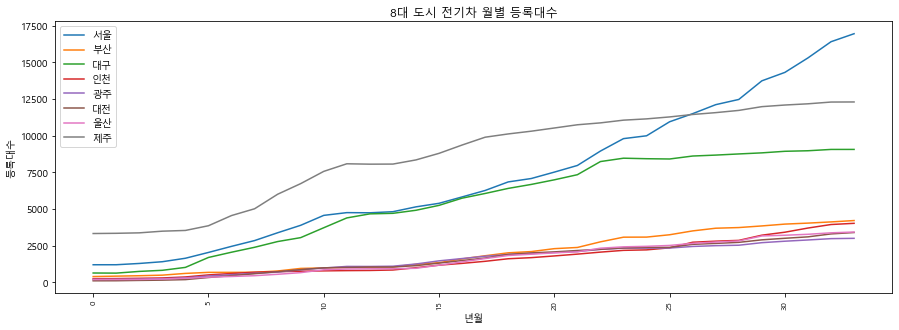

In [8]:
plt.figure(figsize=(15,5)) 
plt.plot(elec_df.index, elec_df['서울'].values, label='서울')
plt.plot(elec_df.index, elec_df['부산'].values, label='부산')
plt.plot(elec_df.index, elec_df['대구'].values, label='대구')
plt.plot(elec_df.index, elec_df['인천'].values, label='인천')
plt.plot(elec_df.index, elec_df['광주'].values, label='광주')
plt.plot(elec_df.index, elec_df['대전'].values, label='대전')
plt.plot(elec_df.index, elec_df['울산'].values, label='울산')
plt.plot(elec_df.index, elec_df['제주'].values, label='제주')
#plt.bar(bydate.index, bydate.values, label='일일 확진자 수', color='r')
plt.title('8대 도시 전기차 월별 등록대수')
plt.xticks(size=8,rotation='vertical')
plt.xlabel('년월')
plt.ylabel('등록대수')
plt.legend()
plt.show()

In [24]:
elec_df.set_index('년월',inplace=True)
elec_df

,서울,부산,대구,인천,광주,대전,울산,제주,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%),제주 증가율(%)
년월,,,,,,,,,,,,,,,,
2018. 01,1201.0,396.0,638.0,251.0,200.0,106.0,191.0,3331.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018. 02,1202.0,424.0,630.0,258.0,202.0,110.0,193.0,3346.0,0.083264,7.070707,-1.253918,2.788845,1.000000,3.773585,1.047120,0.450315
2018. 03,1289.0,452.0,747.0,277.0,220.0,133.0,200.0,3377.0,7.237937,6.603774,18.571429,7.364341,8.910891,20.909091,3.626943,0.926479
2018. 04,1408.0,492.0,822.0,300.0,248.0,151.0,225.0,3491.0,9.231963,8.849558,10.040161,8.303249,12.727273,13.533835,12.500000,3.375777
2018. 05,1644.0,610.0,1021.0,368.0,308.0,187.0,280.0,3541.0,16.761364,23.983740,24.209246,22.666667,24.193548,23.841060,24.444444,1.432254
2018. 06,2041.0,682.0,1698.0,509.0,435.0,331.0,354.0,3862.0,24.148418,11.803279,66.307542,38.315217,41.233766,77.005348,26.428571,9.065236
2018. 07,2456.0,682.0,2056.0,605.0,525.0,460.0,401.0,4557.0,20.333170,0.000000,21.083628,18.860511,20.689655,38.972810,13.276836,17.995857
2018. 08,2850.0,689.0,2392.0,692.0,619.0,589.0,454.0,5019.0,16.042345,1.026393,16.342412,14.380165,17.904762,28.043478,13.216958,10.138249
2018. 09,3383.0,776.0,2783.0,731.0,696.0,728.0,550.0,6010.0,18.701754,12.626996,16.346154,5.635838,12.439418,23.599321,21.145374,19.744969


In [10]:
elec_df.to_excel("elec_df.xlsx")

In [25]:
elec_df_index

,년월,서울,부산,대구,인천,광주,대전,울산,제주,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%),제주 증가율(%)
0,2018. 01,1201.0,396.0,638.0,251.0,200.0,106.0,191.0,3331.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018. 02,1202.0,424.0,630.0,258.0,202.0,110.0,193.0,3346.0,0.083264,7.070707,-1.253918,2.788845,1.000000,3.773585,1.047120,0.450315
2,2018. 03,1289.0,452.0,747.0,277.0,220.0,133.0,200.0,3377.0,7.237937,6.603774,18.571429,7.364341,8.910891,20.909091,3.626943,0.926479
3,2018. 04,1408.0,492.0,822.0,300.0,248.0,151.0,225.0,3491.0,9.231963,8.849558,10.040161,8.303249,12.727273,13.533835,12.500000,3.375777
4,2018. 05,1644.0,610.0,1021.0,368.0,308.0,187.0,280.0,3541.0,16.761364,23.983740,24.209246,22.666667,24.193548,23.841060,24.444444,1.432254
5,2018. 06,2041.0,682.0,1698.0,509.0,435.0,331.0,354.0,3862.0,24.148418,11.803279,66.307542,38.315217,41.233766,77.005348,26.428571,9.065236
6,2018. 07,2456.0,682.0,2056.0,605.0,525.0,460.0,401.0,4557.0,20.333170,0.000000,21.083628,18.860511,20.689655,38.972810,13.276836,17.995857
7,2018. 08,2850.0,689.0,2392.0,692.0,619.0,589.0,454.0,5019.0,16.042345,1.026393,16.342412,14.380165,17.904762,28.043478,13.216958,10.138249
8,2018. 09,3383.0,776.0,2783.0,731.0,696.0,728.0,550.0,6010.0,18.701754,12.626996,16.346154,5.635838,12.439418,23.599321,21.145374,19.744969
9,2018. 10,3892.0,951.0,3051.0,758.0,858.0,867.0,663.0,6735.0,15.045817,22.551546,9.629896,3.693570,23.275862,19.093407,20.545455,12.063228


In [28]:
elec_df_inc = elec_df_index.filter(['년월','서울 증가율(%)','부산 증가율(%)','대구 증가율(%)','인천 증가율(%)','광주 증가율(%)','대전 증가율(%)','울산 증가율(%)','제주 증가율(%)'])
elec_df_inc.head()

,년월,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%),제주 증가율(%)
0,2018. 01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018. 02,0.083264,7.070707,-1.253918,2.788845,1.000000,3.773585,1.047120,0.450315
2,2018. 03,7.237937,6.603774,18.571429,7.364341,8.910891,20.909091,3.626943,0.926479
3,2018. 04,9.231963,8.849558,10.040161,8.303249,12.727273,13.533835,12.500000,3.375777
4,2018. 05,16.761364,23.983740,24.209246,22.666667,24.193548,23.841060,24.444444,1.432254


In [29]:
#연도와 월을 분리하여 열 추가  
elec_df_inc['연도'] = elec_df_inc['년월'].str.split('.').str[0]
elec_df_inc['월'] = elec_df_inc['년월'].str.split('.').str[1]
elec_df_inc.head()

,년월,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%),제주 증가율(%),연도,월
0,2018. 01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018,01
1,2018. 02,0.083264,7.070707,-1.253918,2.788845,1.000000,3.773585,1.047120,0.450315,2018,02
2,2018. 03,7.237937,6.603774,18.571429,7.364341,8.910891,20.909091,3.626943,0.926479,2018,03
3,2018. 04,9.231963,8.849558,10.040161,8.303249,12.727273,13.533835,12.500000,3.375777,2018,04
4,2018. 05,16.761364,23.983740,24.209246,22.666667,24.193548,23.841060,24.444444,1.432254,2018,05


In [72]:
elec_df_inc_yr=elec_df_inc.groupby('연도').mean()
elec_df_inc_yr

,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%),제주 증가율(%)
연도,,,,,,,,
2018,12.422791,8.419567,18.446187,10.633904,15.625784,22.184472,14.308673,7.869424
2019,6.267449,9.854843,5.655514,8.828099,6.679446,7.303331,8.728093,2.666180
2020,5.666026,3.206514,0.688683,6.412415,2.585356,3.791467,3.589720,1.070136


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '서울 증가율(%)'),
  Text(1, 0, '부산 증가율(%)'),
  Text(2, 0, '대구 증가율(%)'),
  Text(3, 0, '인천 증가율(%)'),
  Text(4, 0, '광주 증가율(%)'),
  Text(5, 0, '대전 증가율(%)'),
  Text(6, 0, '울산 증가율(%)'),
  Text(7, 0, '제주 증가율(%)')])

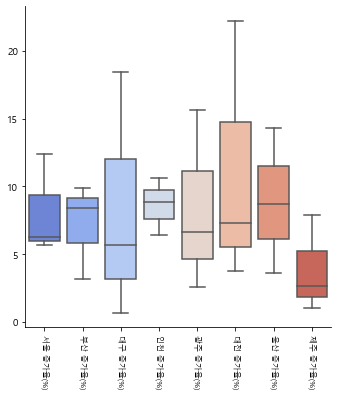

In [73]:
sns.catplot(data=elec_df_inc_yr,kind='box',palette='coolwarm')
plt.xticks(size=8,rotation=270)

In [64]:
elec_df_inc_yr=elec_df_inc.groupby('월').mean()
elec_df_inc_yr

,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%),제주 증가율(%)
월,,,,,,,,
01,0.579099,0.678667,1.963115,0.920040,-0.063396,1.326033,0.957687,0.154957
02,3.745582,4.729947,-0.229082,4.335718,0.970391,1.176321,1.271052,0.572486
03,6.377598,10.567536,8.462993,14.109245,9.109978,12.925489,4.325920,1.975510
04,6.422291,7.718047,5.865325,9.384407,10.670422,10.350078,12.620451,3.280034
05,9.252557,14.725159,11.485526,11.651157,12.031408,13.321839,15.482272,3.062795
06,13.965393,9.427075,24.241463,20.534276,19.318436,31.654976,18.236431,5.649575
07,11.274897,4.755627,9.333913,12.428589,10.332710,19.154636,9.190442,7.058104
08,8.775730,2.310238,6.994904,9.134109,8.052336,12.222536,6.700030,4.223841
09,10.694143,8.044129,7.349772,6.331254,6.383758,11.141341,9.679612,7.614840


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ' 01'),
  Text(1, 0, ' 02'),
  Text(2, 0, ' 03'),
  Text(3, 0, ' 04'),
  Text(4, 0, ' 05'),
  Text(5, 0, ' 06'),
  Text(6, 0, ' 07'),
  Text(7, 0, ' 08'),
  Text(8, 0, ' 09'),
  Text(9, 0, ' 10'),
  Text(10, 0, ' 11'),
  Text(11, 0, ' 12')])

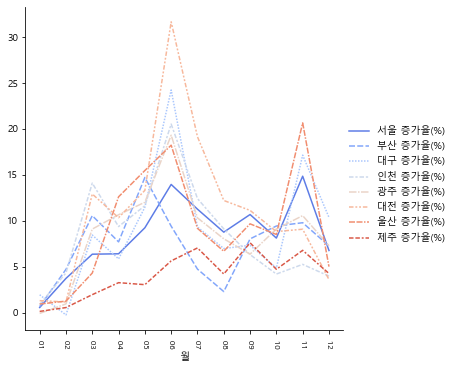

In [65]:
sns.relplot(data=elec_df_inc_yr,kind='line',palette='coolwarm')
plt.xticks(size=8,rotation=270)

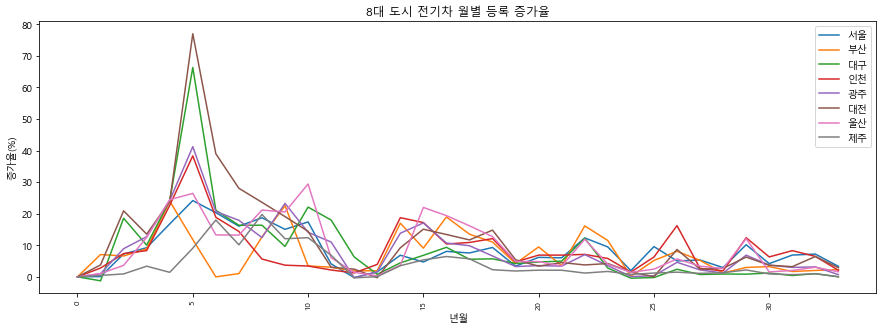

In [11]:
plt.figure(figsize=(15,5)) 
plt.plot(elec_df.index, elec_df['서울 증가율(%)'].values, label='서울')
plt.plot(elec_df.index, elec_df['부산 증가율(%)'].values, label='부산')
plt.plot(elec_df.index, elec_df['대구 증가율(%)'].values, label='대구')
plt.plot(elec_df.index, elec_df['인천 증가율(%)'].values, label='인천')
plt.plot(elec_df.index, elec_df['광주 증가율(%)'].values, label='광주')
plt.plot(elec_df.index, elec_df['대전 증가율(%)'].values, label='대전')
plt.plot(elec_df.index, elec_df['울산 증가율(%)'].values, label='울산')
plt.plot(elec_df.index, elec_df['제주 증가율(%)'].values, label='제주')
#plt.bar(bydate.index, bydate.values, label='일일 확진자 수', color='r')
plt.title('8대 도시 전기차 월별 등록 증가율')
plt.xticks(size=8,rotation='vertical')
plt.xlabel('년월')
plt.ylabel('증가율(%)')
plt.legend()
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, '2018. 01'),
  Text(1, 0, '2018. 02'),
  Text(2, 0, '2018. 03'),
  Text(3, 0, '2018. 04'),
  Text(4, 0, '2018. 05'),
  Text(5, 0, '2018. 06'),
  Text(6, 0, '2018. 07'),
  Text(7, 0, '2018. 08'),
  Text(8, 0, '2018. 09'),
  Text(9, 0, '2018. 10'),
  Text(10, 0, '2018. 11'),
  Text(11, 0, '2018. 12'),
  Text(12, 0, '2019. 01'),
  Text(13, 0, '2019. 02'),
  Text(14, 0, '2019. 03'),
  Text(15, 0, '2019. 04'),
  Text(16, 0, '2019. 05'),
  Text(17, 0, '2019. 06'),
  Text(18, 0, '2019. 07'),
  Text(19, 0, '2019. 08'),
  Text(20, 0, '2019. 09'),
  Text(21, 0, '2019. 10'),
  Text(22, 0, '2019. 11'),
  Text(23, 0, '2019. 12'),
  Text(24, 0, '2020. 01'),
  Text(25, 0, '2020. 02'),
  Text(26, 0, '2020. 03'),
  Text(27, 0, '2020. 04'),
  Text(28, 0, '2020. 05'),
  Text(29, 0, '2020. 06'),
  Tex

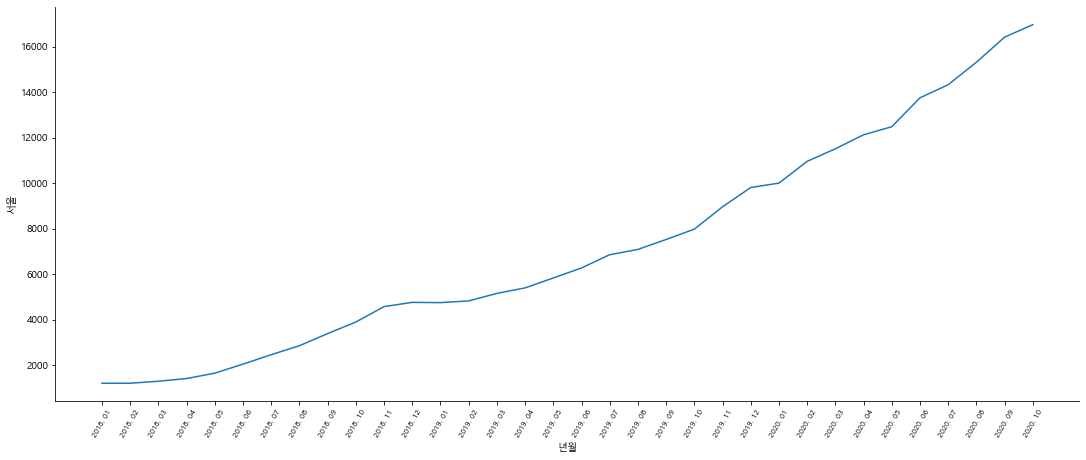

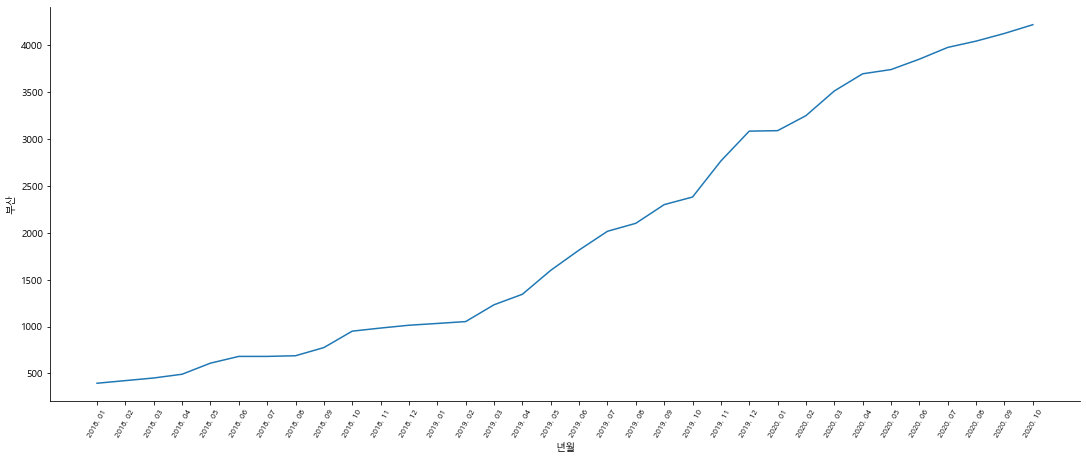

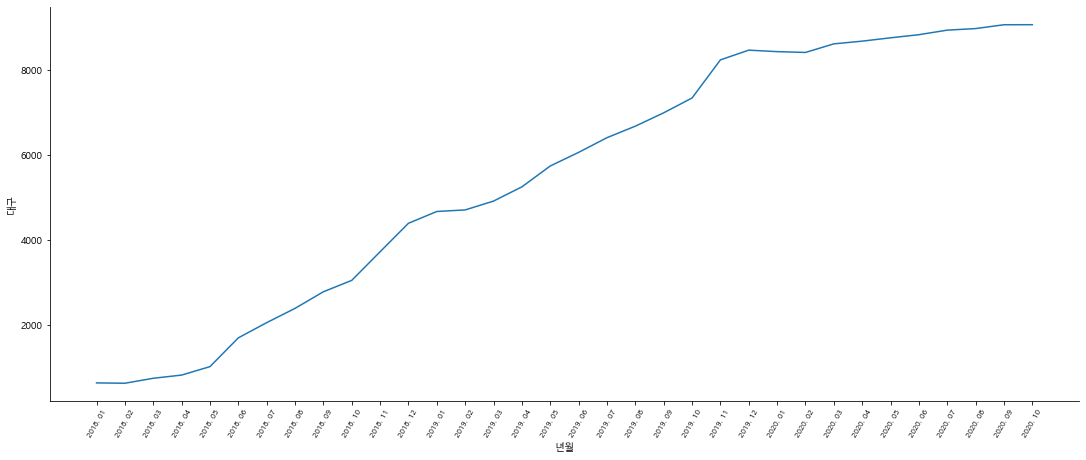

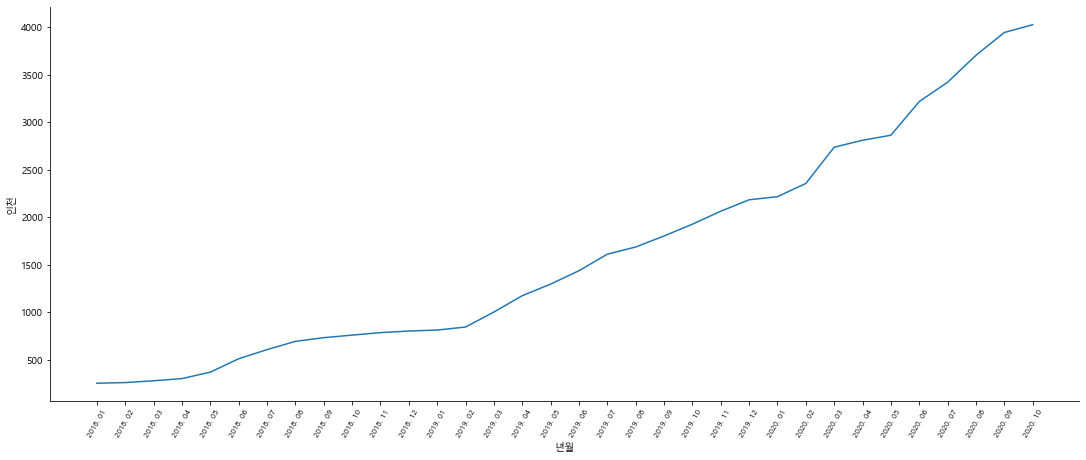

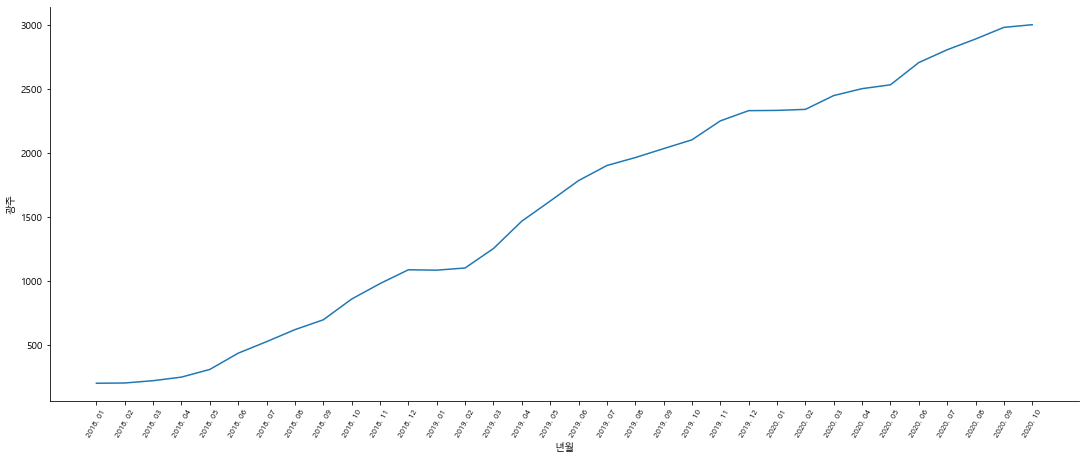

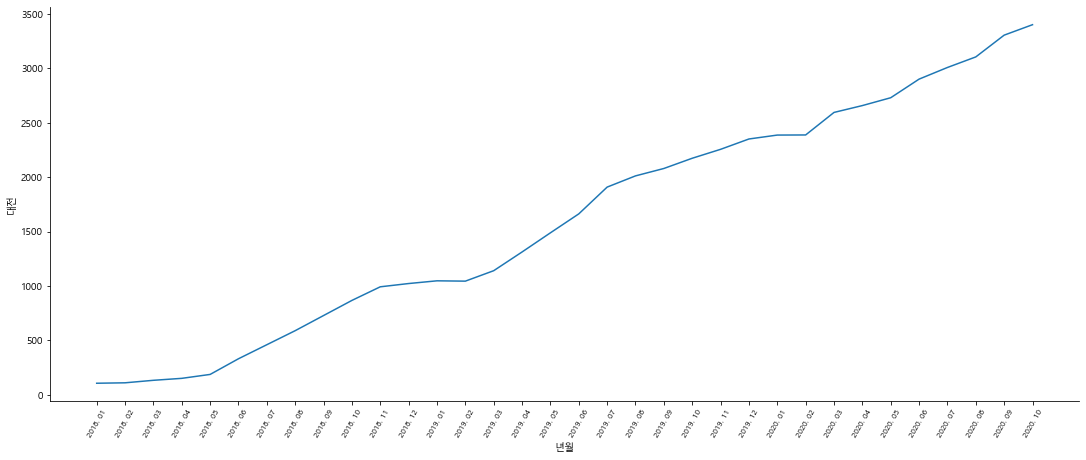

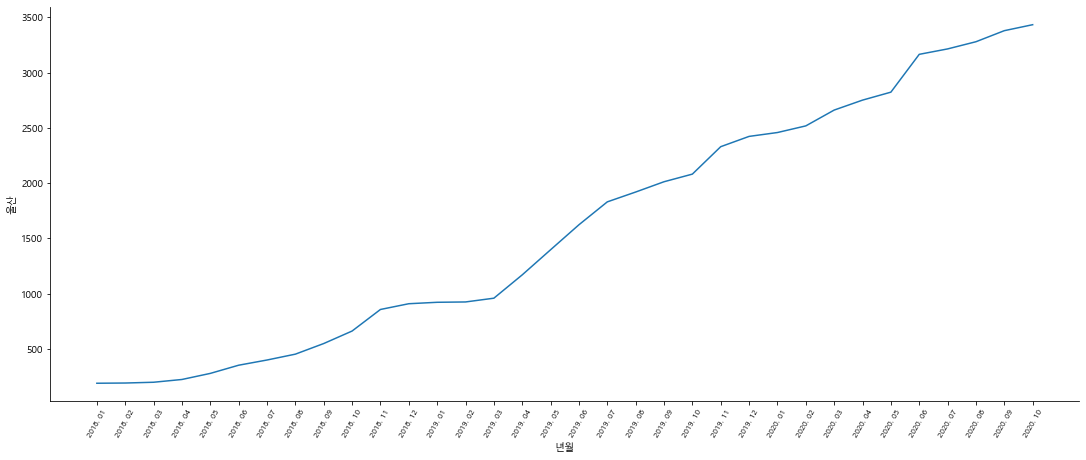

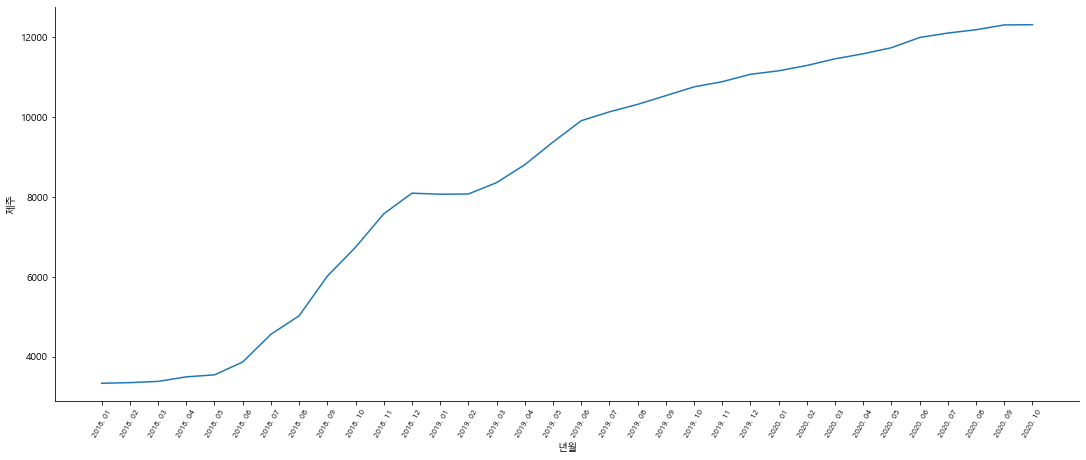

In [17]:
sns.relplot(x="년월", y="서울", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="부산", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="대구", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="인천", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="광주", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="대전", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="울산", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="제주", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, '2018. 01'),
  Text(1, 0, '2018. 02'),
  Text(2, 0, '2018. 03'),
  Text(3, 0, '2018. 04'),
  Text(4, 0, '2018. 05'),
  Text(5, 0, '2018. 06'),
  Text(6, 0, '2018. 07'),
  Text(7, 0, '2018. 08'),
  Text(8, 0, '2018. 09'),
  Text(9, 0, '2018. 10'),
  Text(10, 0, '2018. 11'),
  Text(11, 0, '2018. 12'),
  Text(12, 0, '2019. 01'),
  Text(13, 0, '2019. 02'),
  Text(14, 0, '2019. 03'),
  Text(15, 0, '2019. 04'),
  Text(16, 0, '2019. 05'),
  Text(17, 0, '2019. 06'),
  Text(18, 0, '2019. 07'),
  Text(19, 0, '2019. 08'),
  Text(20, 0, '2019. 09'),
  Text(21, 0, '2019. 10'),
  Text(22, 0, '2019. 11'),
  Text(23, 0, '2019. 12'),
  Text(24, 0, '2020. 01'),
  Text(25, 0, '2020. 02'),
  Text(26, 0, '2020. 03'),
  Text(27, 0, '2020. 04'),
  Text(28, 0, '2020. 05'),
  Text(29, 0, '2020. 06'),
  Tex

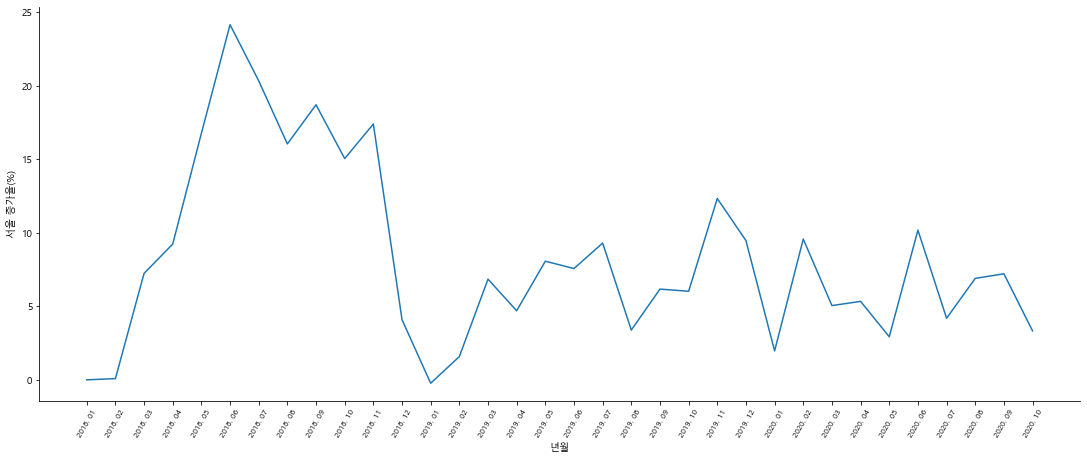

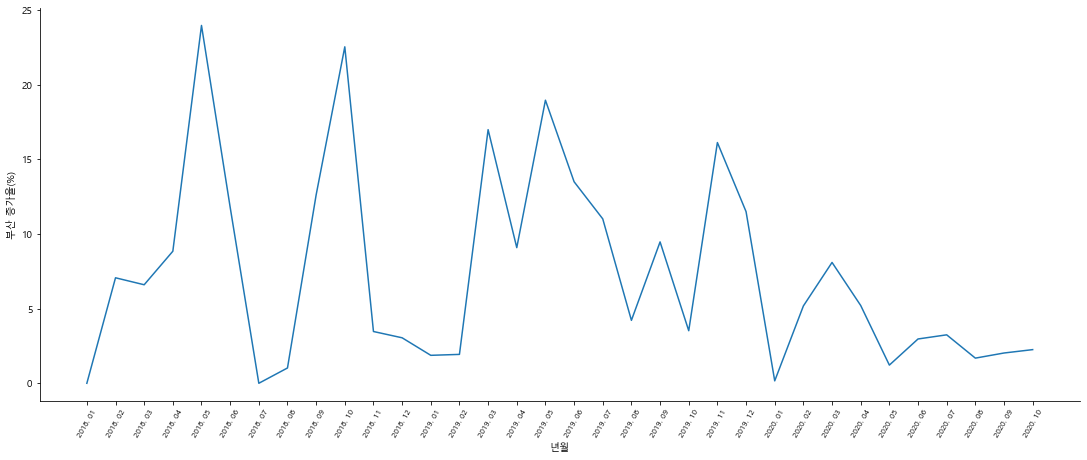

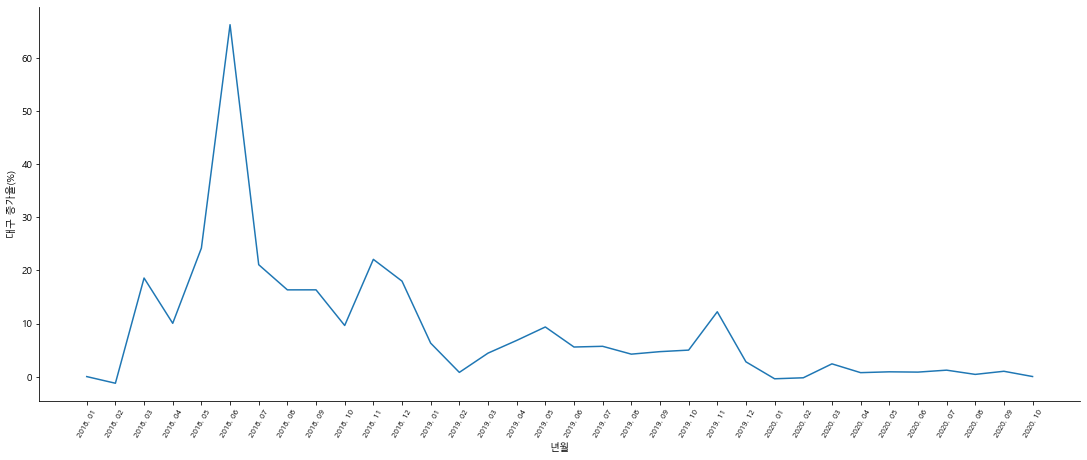

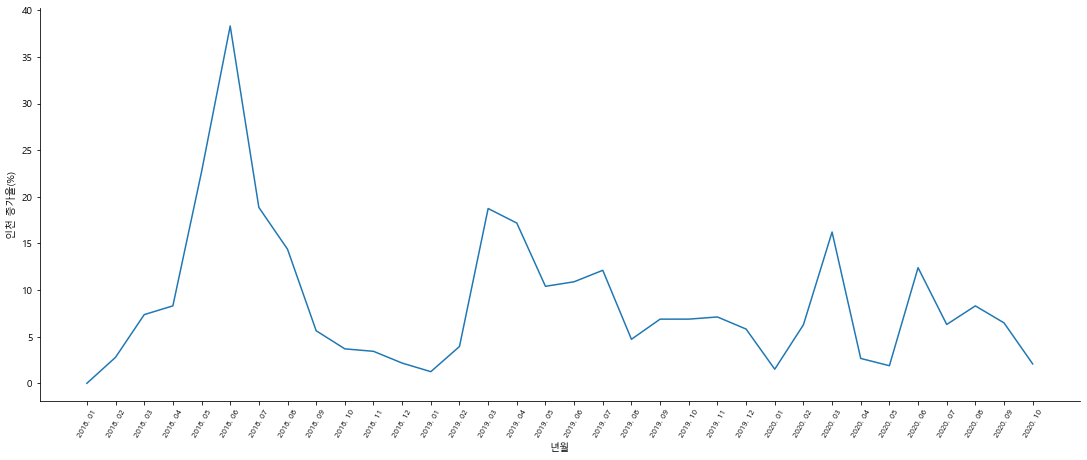

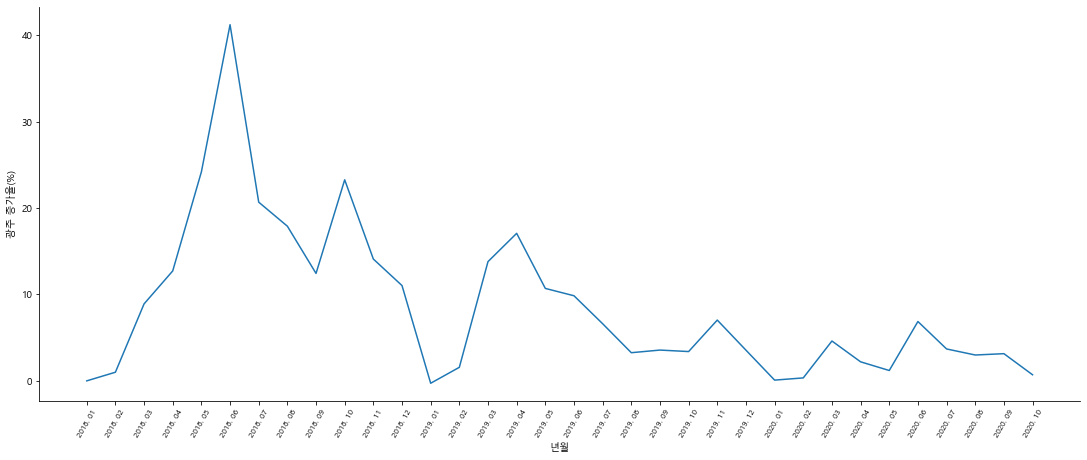

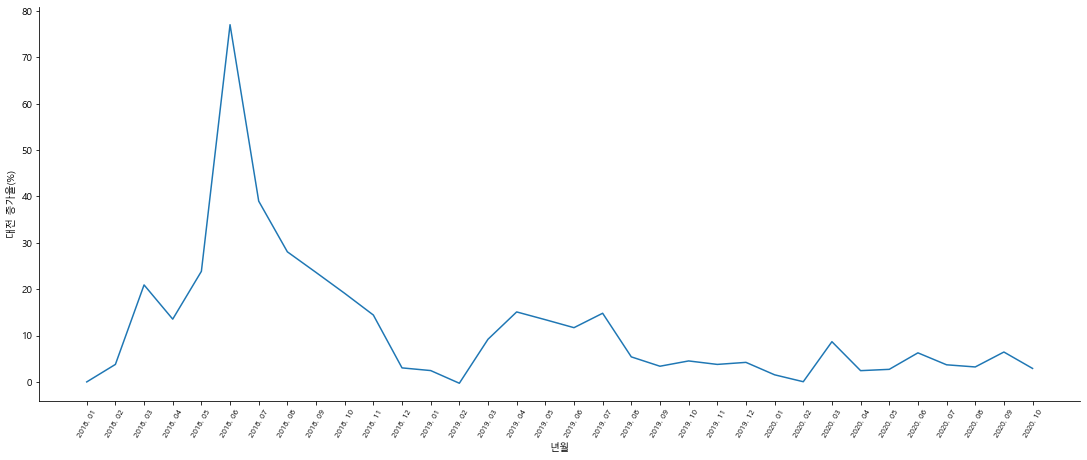

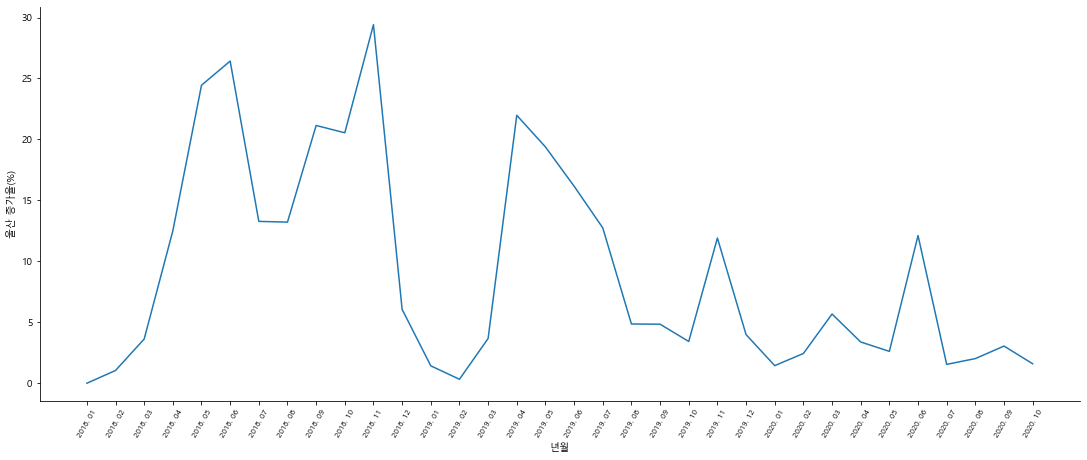

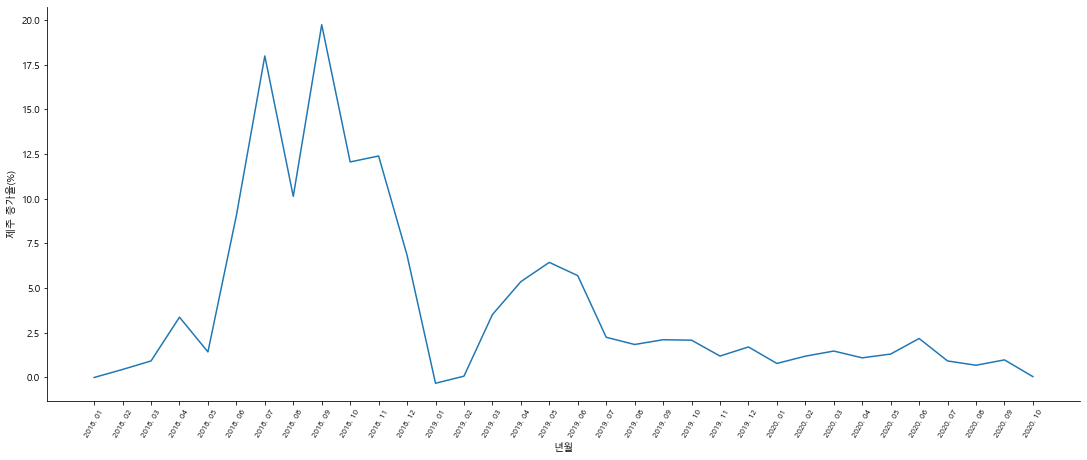

In [12]:
sns.relplot(x="년월", y="서울 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="부산 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="대구 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="인천 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="광주 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="대전 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="울산 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="제주 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, '2018. 01'),
  Text(1, 0, '2018. 02'),
  Text(2, 0, '2018. 03'),
  Text(3, 0, '2018. 04'),
  Text(4, 0, '2018. 05'),
  Text(5, 0, '2018. 06'),
  Text(6, 0, '2018. 07'),
  Text(7, 0, '2018. 08'),
  Text(8, 0, '2018. 09'),
  Text(9, 0, '2018. 10'),
  Text(10, 0, '2018. 11'),
  Text(11, 0, '2018. 12'),
  Text(12, 0, '2019. 01'),
  Text(13, 0, '2019. 02'),
  Text(14, 0, '2019. 03'),
  Text(15, 0, '2019. 04'),
  Text(16, 0, '2019. 05'),
  Text(17, 0, '2019. 06'),
  Text(18, 0, '2019. 07'),
  Text(19, 0, '2019. 08'),
  Text(20, 0, '2019. 09'),
  Text(21, 0, '2019. 10'),
  Text(22, 0, '2019. 11'),
  Text(23, 0, '2019. 12'),
  Text(24, 0, '2020. 01'),
  Text(25, 0, '2020. 02'),
  Text(26, 0, '2020. 03'),
  Text(27, 0, '2020. 04'),
  Text(28, 0, '2020. 05'),
  Text(29, 0, '2020. 06'),
  Tex

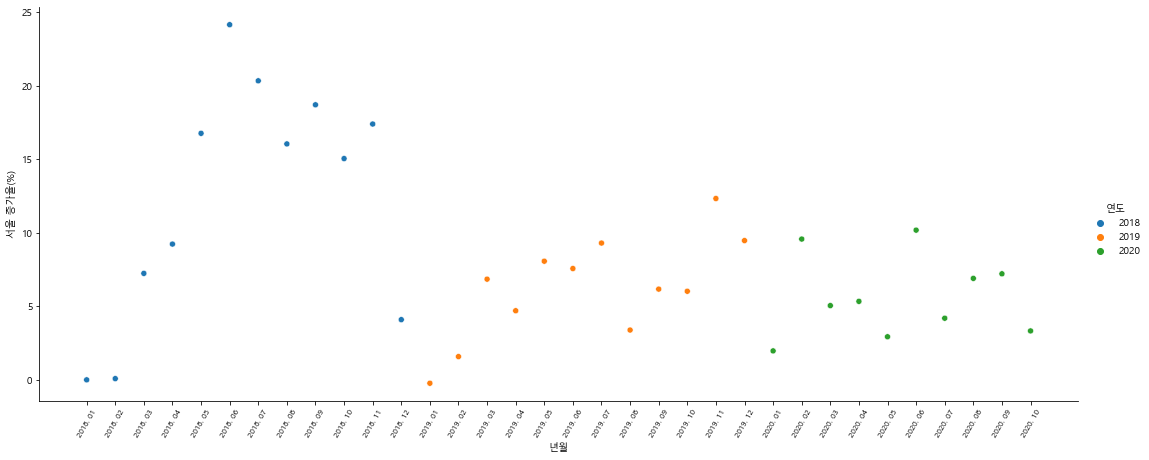

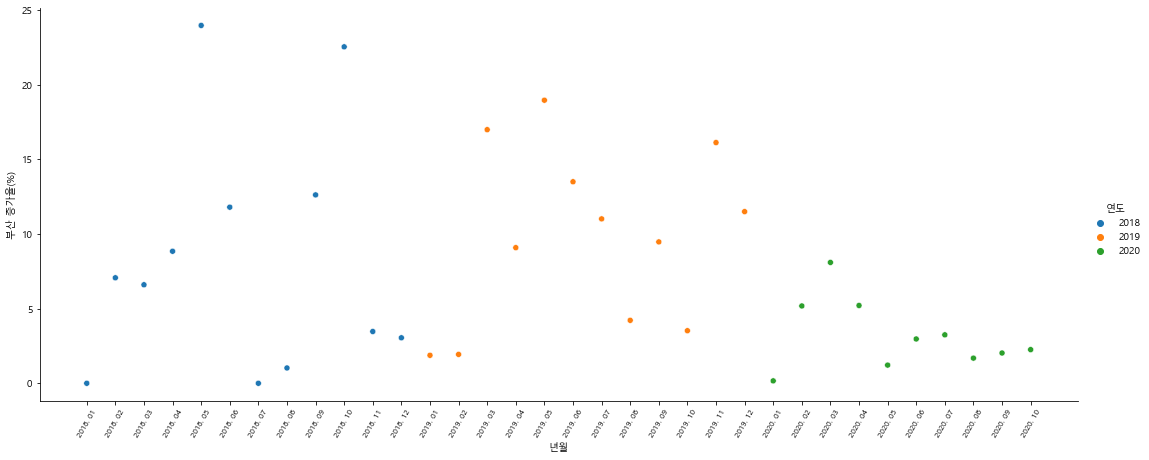

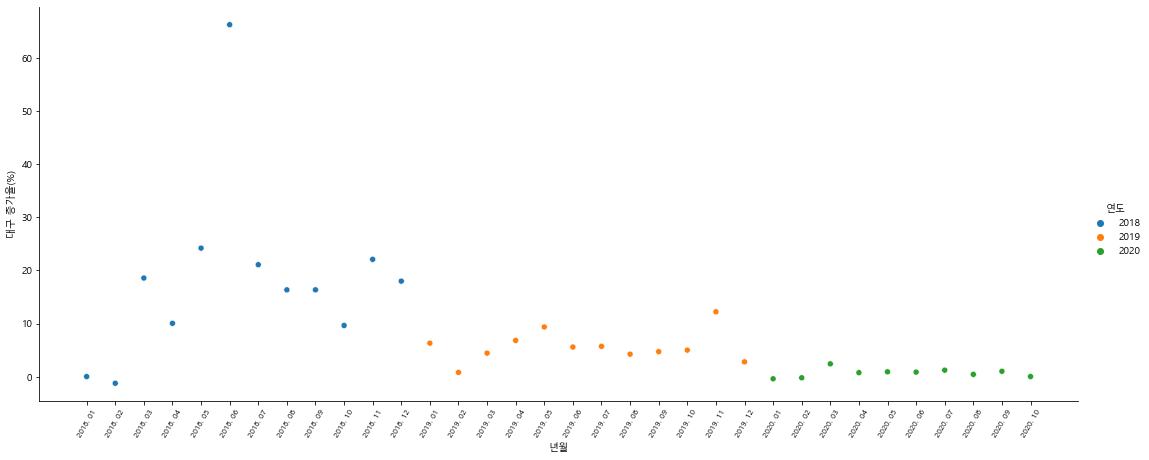

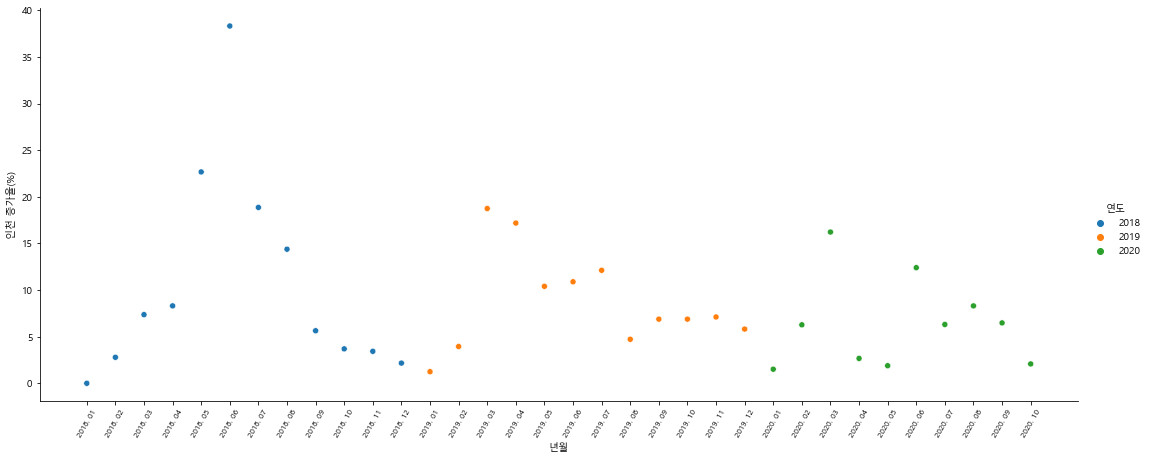

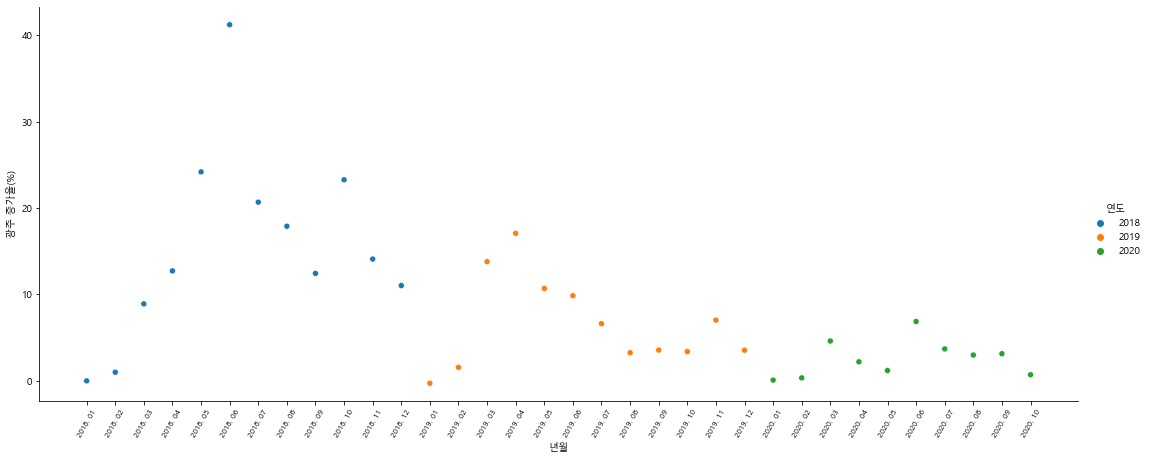

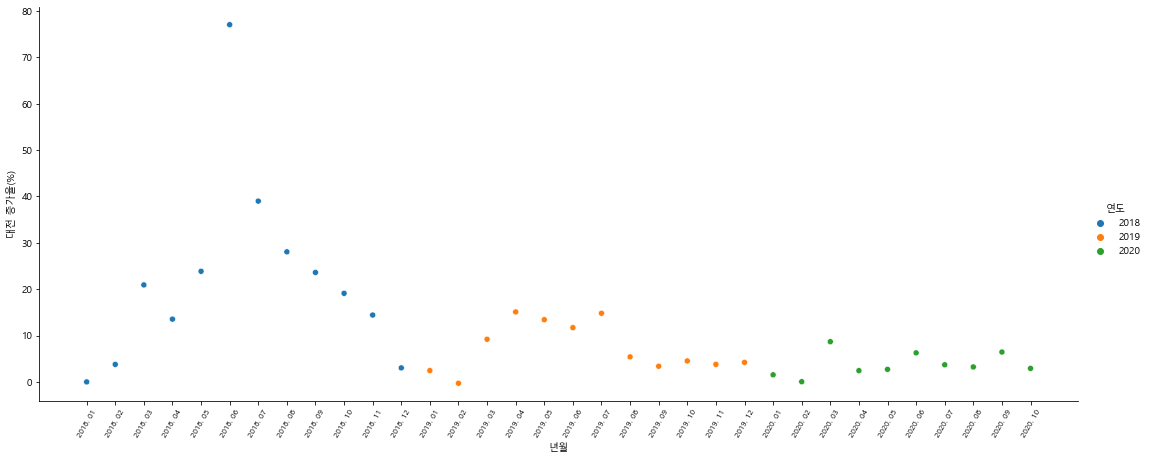

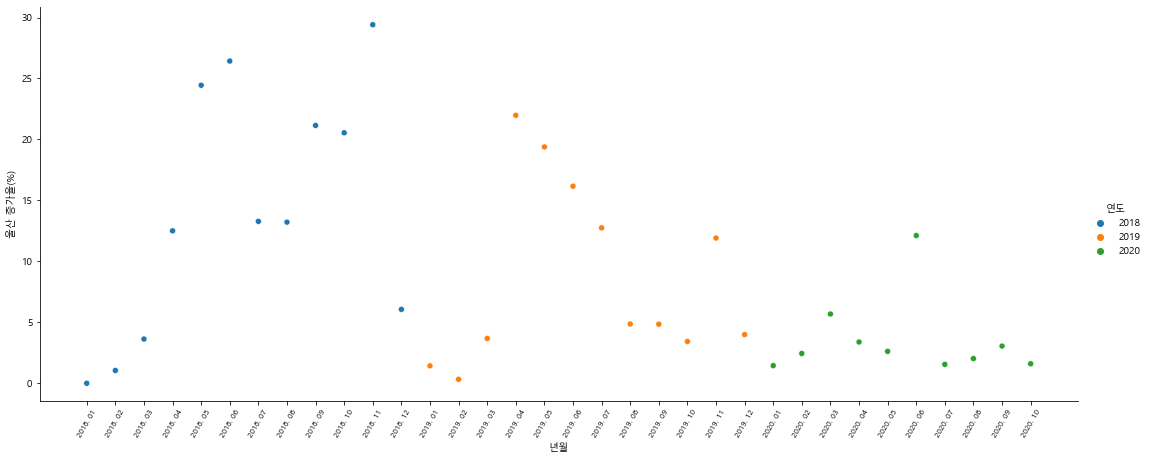

In [33]:
sns.relplot(x="년월", y="서울 증가율(%)", data=elec_df, hue='연도', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="부산 증가율(%)", data=elec_df, hue='연도', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="대구 증가율(%)", data=elec_df, hue='연도', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="인천 증가율(%)", data=elec_df, hue='연도', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="광주 증가율(%)", data=elec_df, hue='연도', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="대전 증가율(%)", data=elec_df, hue='연도', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="울산 증가율(%)", data=elec_df, hue='연도', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)

In [81]:
# fuel 파일 불러오기 
fuel_df=pd.read_excel('fuel_car01.xlsx',index_col='년월') 
fuel_df.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
년월,,,,,,,,,,,,,,,,,
2018. 01,2643177,1088666,958979,1268157,535707,549043,460716,112123,4391093,562318,600260,796339,671863,714511,1025050,1316339,400276
2018. 02,2643317,1091492,960286,1272896,536338,549229,461396,114005,4401156,563289,601707,799108,673028,716281,1026505,1318231,403364
2018. 03,2643039,1094475,962578,1277685,537527,549922,462642,115849,4419701,565157,603992,802670,674568,719811,1028907,1321802,407739
2018. 04,2646341,1098482,963901,1282664,538609,550994,463830,117703,4439557,567011,606479,805577,677150,722820,1031583,1324208,412303
2018. 05,2647416,1101881,965639,1287148,539578,551570,464640,119168,4458428,568368,608568,807971,679042,726511,1034074,1325821,416861


In [82]:
fuel_df = fuel_df.filter(['서울', '부산', '대구', '인천', '광주', '대전', '울산','제주'])
fuel_df.head()

,서울,부산,대구,인천,광주,대전,울산,제주
년월,,,,,,,,
2018. 01,2643177,1088666,958979,1268157,535707,549043,460716,400276
2018. 02,2643317,1091492,960286,1272896,536338,549229,461396,403364
2018. 03,2643039,1094475,962578,1277685,537527,549922,462642,407739
2018. 04,2646341,1098482,963901,1282664,538609,550994,463830,412303
2018. 05,2647416,1101881,965639,1287148,539578,551570,464640,416861


In [83]:
fuel_df = fuel_df.reset_index()
fuel_df

,년월,서울,부산,대구,인천,광주,대전,울산,제주
0,2018. 01,2643177,1088666,958979,1268157,535707,549043,460716,400276
1,2018. 02,2643317,1091492,960286,1272896,536338,549229,461396,403364
2,2018. 03,2643039,1094475,962578,1277685,537527,549922,462642,407739
3,2018. 04,2646341,1098482,963901,1282664,538609,550994,463830,412303
4,2018. 05,2647416,1101881,965639,1287148,539578,551570,464640,416861
5,2018. 06,2648133,1105346,968295,1293019,540975,552338,465140,421409
6,2018. 07,2649310,1109015,969610,1297581,542407,553427,465682,426730
7,2018. 08,2649528,1111675,970381,1302057,543588,554307,466051,430627
8,2018. 09,2651445,1114074,971976,1306712,544685,555195,466599,434220
9,2018. 10,2652097,1116778,972740,1312265,545815,555823,466841,437220


In [84]:
for i in fuel_df.index :
    try :
        fuel_df.loc[i+1,'서울 증가율(%)'] = ((fuel_df.loc[i+1, '서울']-fuel_df.loc[i, '서울'])/fuel_df.loc[i, '서울'])*100
    except :
        fuel_df.loc[i+1,'서울 증가율(%)'] = np.nan
        
for i in fuel_df.index :
    try :
        fuel_df.loc[i+1,'부산 증가율(%)'] = ((fuel_df.loc[i+1, '부산']-fuel_df.loc[i, '부산'])/fuel_df.loc[i, '부산'])*100
    except :
        fuel_df.loc[i+1,'부산 증가율(%)'] = np.nan
        
for i in fuel_df.index :
    try :
        fuel_df.loc[i+1,'대구 증가율(%)'] = ((fuel_df.loc[i+1, '대구']-fuel_df.loc[i, '대구'])/fuel_df.loc[i, '대구'])*100
    except :
        fuel_df.loc[i+1,'대구 증가율(%)'] = np.nan
        
for i in fuel_df.index :
    try :
        fuel_df.loc[i+1,'인천 증가율(%)'] = ((fuel_df.loc[i+1, '인천']-fuel_df.loc[i, '인천'])/fuel_df.loc[i, '인천'])*100
    except :
        fuel_df.loc[i+1,'인천 증가율(%)'] = np.nan
        
for i in fuel_df.index :
    try :
        fuel_df.loc[i+1,'광주 증가율(%)'] = ((fuel_df.loc[i+1, '광주']-fuel_df.loc[i, '광주'])/fuel_df.loc[i, '광주'])*100
    except :
        fuel_df.loc[i+1,'광주 증가율(%)'] = np.nan
        
for i in fuel_df.index :
    try :
        fuel_df.loc[i+1,'대전 증가율(%)'] = ((fuel_df.loc[i+1, '대전']-fuel_df.loc[i, '대전'])/fuel_df.loc[i, '대전'])*100
    except :
        fuel_df.loc[i+1,'대전 증가율(%)'] = np.nan
        
for i in fuel_df.index :
    try :
        fuel_df.loc[i+1,'울산 증가율(%)'] = ((fuel_df.loc[i+1, '울산']-fuel_df.loc[i, '울산'])/fuel_df.loc[i, '울산'])*100
    except :
        fuel_df.loc[i+1,'울산 증가율(%)'] = np.nan

for i in fuel_df.index :
    try :
        fuel_df.loc[i+1,'제주 증가율(%)'] = ((fuel_df.loc[i+1, '제주']-fuel_df.loc[i, '제주'])/fuel_df.loc[i, '제주'])*100
    except :
        fuel_df.loc[i+1,'제주 증가율(%)'] = np.nan
                

fuel_df

,년월,서울,부산,대구,인천,광주,대전,울산,제주,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%),제주 증가율(%)
0,2018. 01,2643177.0,1088666.0,958979.0,1268157.0,535707.0,549043.0,460716.0,400276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018. 02,2643317.0,1091492.0,960286.0,1272896.0,536338.0,549229.0,461396.0,403364.0,0.005297,0.259584,0.136291,0.373692,0.117788,0.033877,0.147596,0.771468
2,2018. 03,2643039.0,1094475.0,962578.0,1277685.0,537527.0,549922.0,462642.0,407739.0,-0.010517,0.273296,0.238679,0.376229,0.221689,0.126177,0.270050,1.084628
3,2018. 04,2646341.0,1098482.0,963901.0,1282664.0,538609.0,550994.0,463830.0,412303.0,0.124932,0.366112,0.137443,0.389689,0.201292,0.194937,0.256786,1.119344
4,2018. 05,2647416.0,1101881.0,965639.0,1287148.0,539578.0,551570.0,464640.0,416861.0,0.040622,0.309427,0.180309,0.349585,0.179908,0.104538,0.174633,1.105498
5,2018. 06,2648133.0,1105346.0,968295.0,1293019.0,540975.0,552338.0,465140.0,421409.0,0.027083,0.314462,0.275051,0.456125,0.258906,0.139239,0.107610,1.091011
6,2018. 07,2649310.0,1109015.0,969610.0,1297581.0,542407.0,553427.0,465682.0,426730.0,0.044446,0.331932,0.135806,0.352818,0.264707,0.197162,0.116524,1.262669
7,2018. 08,2649528.0,1111675.0,970381.0,1302057.0,543588.0,554307.0,466051.0,430627.0,0.008229,0.239852,0.079517,0.344950,0.217733,0.159009,0.079239,0.913224
8,2018. 09,2651445.0,1114074.0,971976.0,1306712.0,544685.0,555195.0,466599.0,434220.0,0.072353,0.215800,0.164368,0.357511,0.201807,0.160200,0.117584,0.834365
9,2018. 10,2652097.0,1116778.0,972740.0,1312265.0,545815.0,555823.0,466841.0,437220.0,0.024590,0.242713,0.078603,0.424960,0.207459,0.113113,0.051865,0.690894


In [85]:
fuel_df = fuel_df.dropna(how='all')
fuel_df = fuel_df.fillna(0)
fuel_df

,년월,서울,부산,대구,인천,광주,대전,울산,제주,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%),제주 증가율(%)
0,2018. 01,2643177.0,1088666.0,958979.0,1268157.0,535707.0,549043.0,460716.0,400276.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018. 02,2643317.0,1091492.0,960286.0,1272896.0,536338.0,549229.0,461396.0,403364.0,0.005297,0.259584,0.136291,0.373692,0.117788,0.033877,0.147596,0.771468
2,2018. 03,2643039.0,1094475.0,962578.0,1277685.0,537527.0,549922.0,462642.0,407739.0,-0.010517,0.273296,0.238679,0.376229,0.221689,0.126177,0.270050,1.084628
3,2018. 04,2646341.0,1098482.0,963901.0,1282664.0,538609.0,550994.0,463830.0,412303.0,0.124932,0.366112,0.137443,0.389689,0.201292,0.194937,0.256786,1.119344
4,2018. 05,2647416.0,1101881.0,965639.0,1287148.0,539578.0,551570.0,464640.0,416861.0,0.040622,0.309427,0.180309,0.349585,0.179908,0.104538,0.174633,1.105498
5,2018. 06,2648133.0,1105346.0,968295.0,1293019.0,540975.0,552338.0,465140.0,421409.0,0.027083,0.314462,0.275051,0.456125,0.258906,0.139239,0.107610,1.091011
6,2018. 07,2649310.0,1109015.0,969610.0,1297581.0,542407.0,553427.0,465682.0,426730.0,0.044446,0.331932,0.135806,0.352818,0.264707,0.197162,0.116524,1.262669
7,2018. 08,2649528.0,1111675.0,970381.0,1302057.0,543588.0,554307.0,466051.0,430627.0,0.008229,0.239852,0.079517,0.344950,0.217733,0.159009,0.079239,0.913224
8,2018. 09,2651445.0,1114074.0,971976.0,1306712.0,544685.0,555195.0,466599.0,434220.0,0.072353,0.215800,0.164368,0.357511,0.201807,0.160200,0.117584,0.834365
9,2018. 10,2652097.0,1116778.0,972740.0,1312265.0,545815.0,555823.0,466841.0,437220.0,0.024590,0.242713,0.078603,0.424960,0.207459,0.113113,0.051865,0.690894


In [86]:
fuel_df.set_index('년월',inplace=True)
fuel_df

,서울,부산,대구,인천,광주,대전,울산,제주,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%),제주 증가율(%)
년월,,,,,,,,,,,,,,,,
2018. 01,2643177.0,1088666.0,958979.0,1268157.0,535707.0,549043.0,460716.0,400276.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018. 02,2643317.0,1091492.0,960286.0,1272896.0,536338.0,549229.0,461396.0,403364.0,0.005297,0.259584,0.136291,0.373692,0.117788,0.033877,0.147596,0.771468
2018. 03,2643039.0,1094475.0,962578.0,1277685.0,537527.0,549922.0,462642.0,407739.0,-0.010517,0.273296,0.238679,0.376229,0.221689,0.126177,0.270050,1.084628
2018. 04,2646341.0,1098482.0,963901.0,1282664.0,538609.0,550994.0,463830.0,412303.0,0.124932,0.366112,0.137443,0.389689,0.201292,0.194937,0.256786,1.119344
2018. 05,2647416.0,1101881.0,965639.0,1287148.0,539578.0,551570.0,464640.0,416861.0,0.040622,0.309427,0.180309,0.349585,0.179908,0.104538,0.174633,1.105498
2018. 06,2648133.0,1105346.0,968295.0,1293019.0,540975.0,552338.0,465140.0,421409.0,0.027083,0.314462,0.275051,0.456125,0.258906,0.139239,0.107610,1.091011
2018. 07,2649310.0,1109015.0,969610.0,1297581.0,542407.0,553427.0,465682.0,426730.0,0.044446,0.331932,0.135806,0.352818,0.264707,0.197162,0.116524,1.262669
2018. 08,2649528.0,1111675.0,970381.0,1302057.0,543588.0,554307.0,466051.0,430627.0,0.008229,0.239852,0.079517,0.344950,0.217733,0.159009,0.079239,0.913224
2018. 09,2651445.0,1114074.0,971976.0,1306712.0,544685.0,555195.0,466599.0,434220.0,0.072353,0.215800,0.164368,0.357511,0.201807,0.160200,0.117584,0.834365


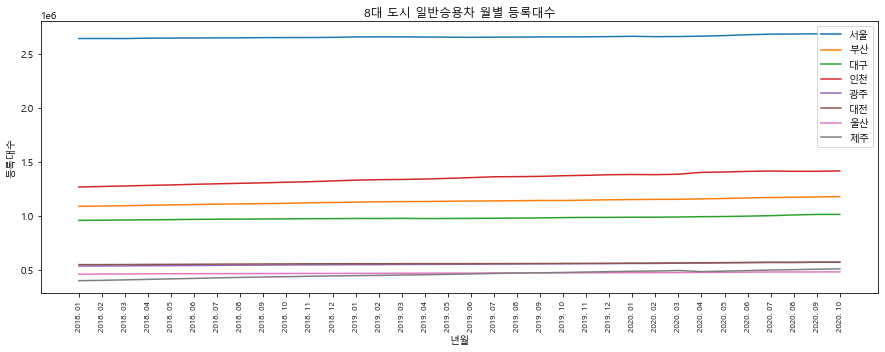

In [87]:
plt.figure(figsize=(15,5)) 
plt.plot(fuel_df.index, fuel_df['서울'].values, label='서울')
plt.plot(fuel_df.index, fuel_df['부산'].values, label='부산')
plt.plot(fuel_df.index, fuel_df['대구'].values, label='대구')
plt.plot(fuel_df.index, fuel_df['인천'].values, label='인천')
plt.plot(fuel_df.index, fuel_df['광주'].values, label='광주')
plt.plot(fuel_df.index, fuel_df['대전'].values, label='대전')
plt.plot(fuel_df.index, fuel_df['울산'].values, label='울산')
plt.plot(fuel_df.index, fuel_df['제주'].values, label='제주')
#plt.bar(bydate.index, bydate.values, label='일일 확진자 수', color='r')
plt.title('8대 도시 일반승용차 월별 등록대수')
plt.xticks(size=8,rotation='vertical')
plt.xlabel('년월')
plt.ylabel('등록대수')
plt.legend()
plt.show()

C:\Users\WS-home\anaconda3\envs\kayoung\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WS-home\anaconda3\envs\kayoung\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


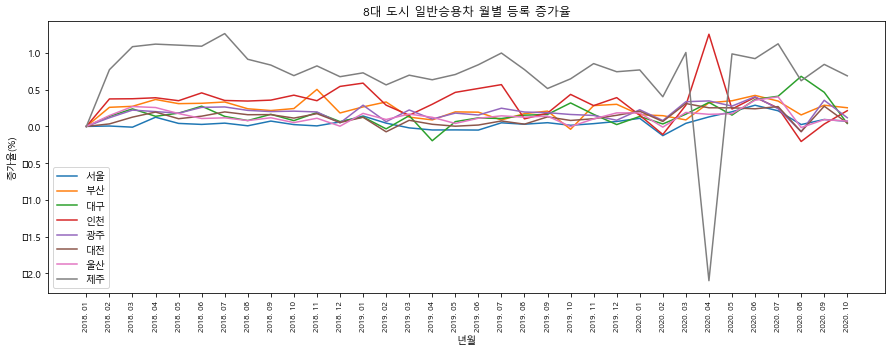

In [88]:
plt.figure(figsize=(15,5)) 
plt.plot(fuel_df.index, fuel_df['서울 증가율(%)'].values, label='서울')
plt.plot(fuel_df.index, fuel_df['부산 증가율(%)'].values, label='부산')
plt.plot(fuel_df.index, fuel_df['대구 증가율(%)'].values, label='대구')
plt.plot(fuel_df.index, fuel_df['인천 증가율(%)'].values, label='인천')
plt.plot(fuel_df.index, fuel_df['광주 증가율(%)'].values, label='광주')
plt.plot(fuel_df.index, fuel_df['대전 증가율(%)'].values, label='대전')
plt.plot(fuel_df.index, fuel_df['울산 증가율(%)'].values, label='울산')
plt.plot(fuel_df.index, fuel_df['제주 증가율(%)'].values, label='제주')
#plt.bar(bydate.index, bydate.values, label='일일 확진자 수', color='r')
plt.title('8대 도시 일반승용차 월별 등록 증가율')
plt.xticks(size=8,rotation='vertical')
plt.xlabel('년월')
plt.ylabel('증가율(%)')
plt.legend()
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, '2018. 01'),
  Text(1, 0, '2018. 02'),
  Text(2, 0, '2018. 03'),
  Text(3, 0, '2018. 04'),
  Text(4, 0, '2018. 05'),
  Text(5, 0, '2018. 06'),
  Text(6, 0, '2018. 07'),
  Text(7, 0, '2018. 08'),
  Text(8, 0, '2018. 09'),
  Text(9, 0, '2018. 10'),
  Text(10, 0, '2018. 11'),
  Text(11, 0, '2018. 12'),
  Text(12, 0, '2019. 01'),
  Text(13, 0, '2019. 02'),
  Text(14, 0, '2019. 03'),
  Text(15, 0, '2019. 04'),
  Text(16, 0, '2019. 05'),
  Text(17, 0, '2019. 06'),
  Text(18, 0, '2019. 07'),
  Text(19, 0, '2019. 08'),
  Text(20, 0, '2019. 09'),
  Text(21, 0, '2019. 10'),
  Text(22, 0, '2019. 11'),
  Text(23, 0, '2019. 12'),
  Text(24, 0, '2020. 01'),
  Text(25, 0, '2020. 02'),
  Text(26, 0, '2020. 03'),
  Text(27, 0, '2020. 04'),
  Text(28, 0, '2020. 05'),
  Text(29, 0, '2020. 06'),
  Tex

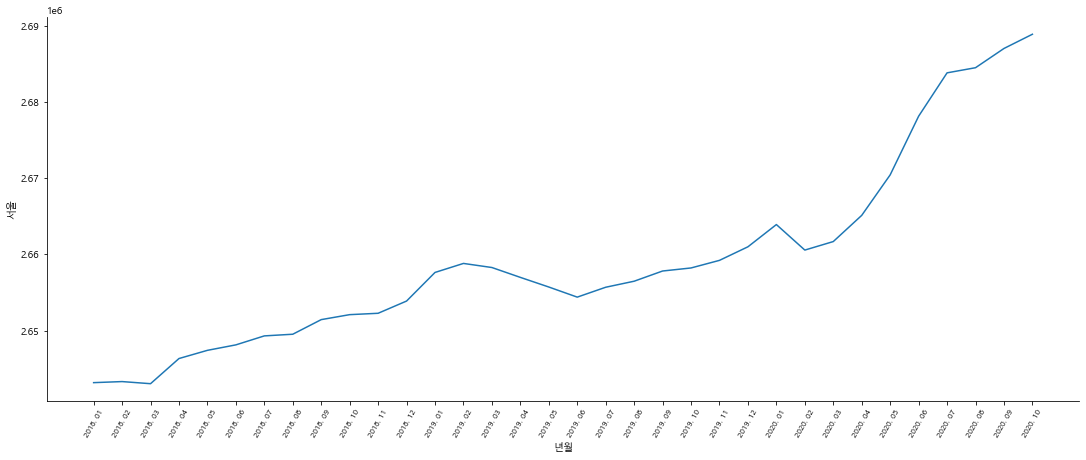

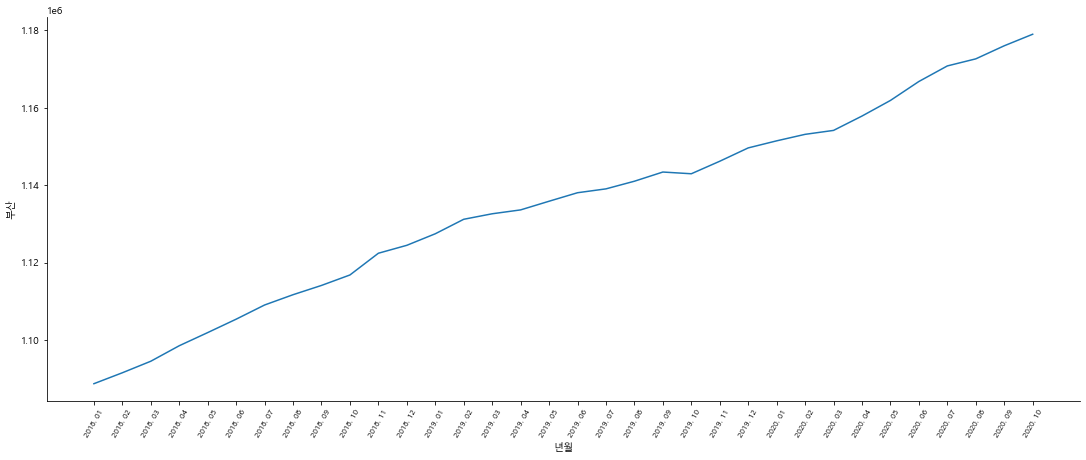

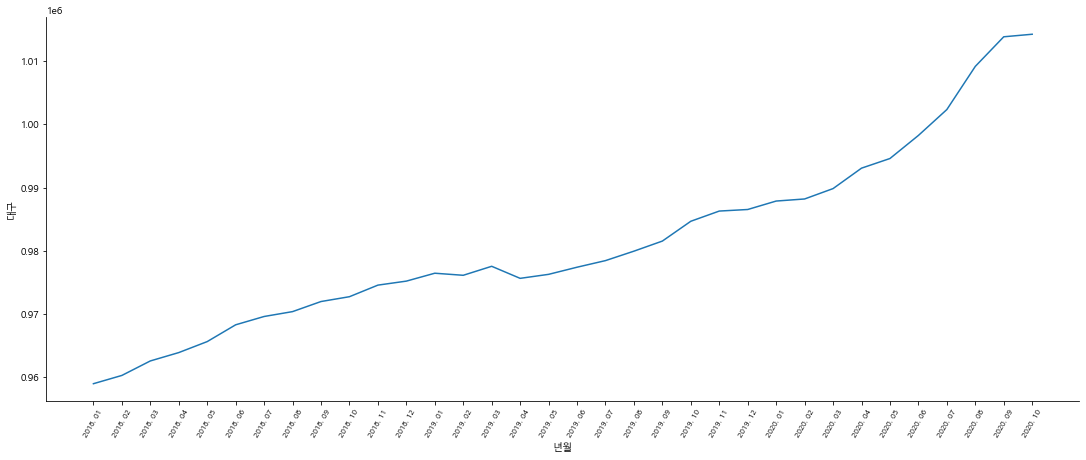

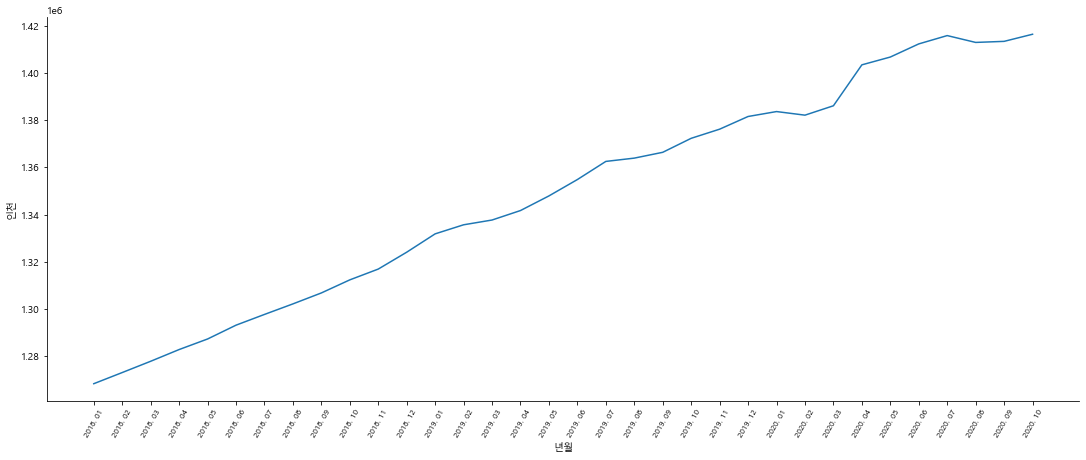

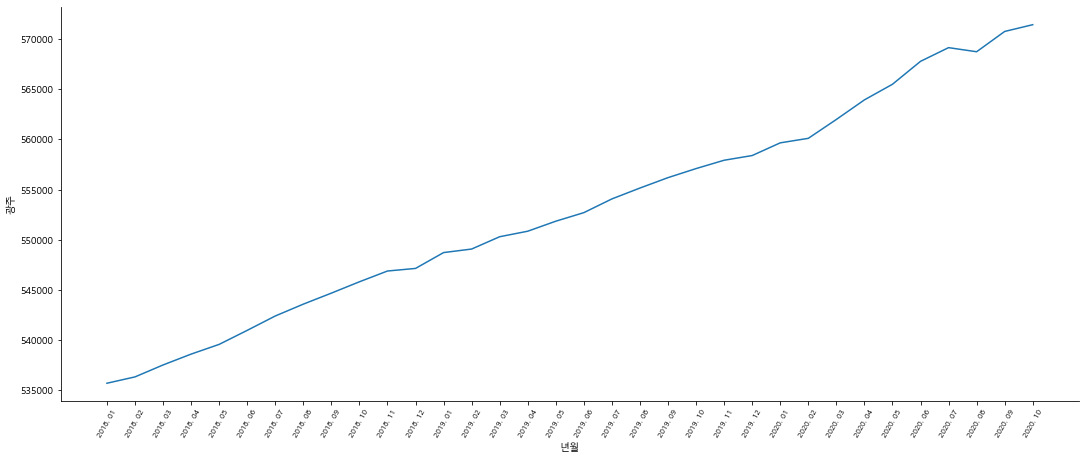

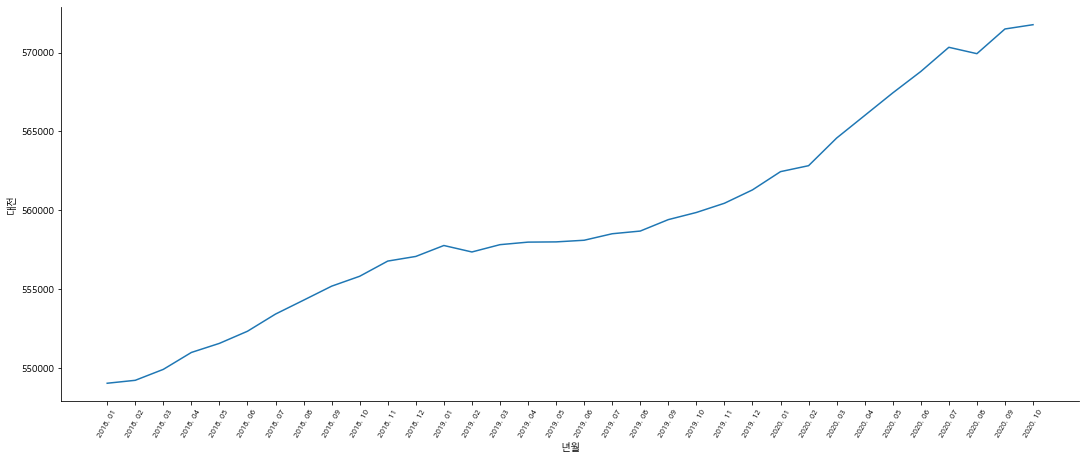

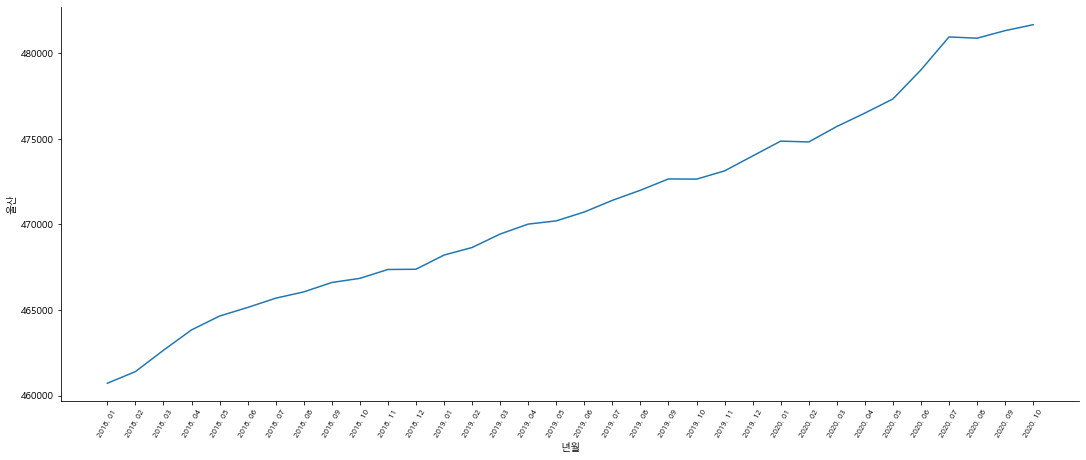

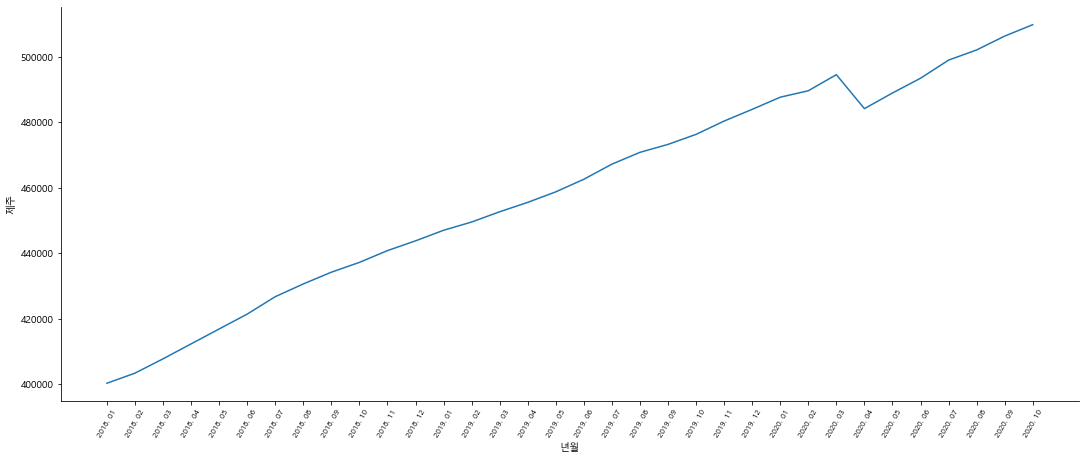

In [89]:
sns.relplot(x="년월", y="서울", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="부산", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="대구", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="인천", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="광주", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="대전", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="울산", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="제주", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)

C:\Users\WS-home\anaconda3\envs\kayoung\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WS-home\anaconda3\envs\kayoung\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WS-home\anaconda3\envs\kayoung\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WS-home\anaconda3\envs\kayoung\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WS-home\anaconda3\envs\kayoung\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, '2018. 01'),
  Text(1, 0, '2018. 02'),
  Text(2, 0, '2018. 03'),
  Text(3, 0, '2018. 04'),
  Text(4, 0, '2018. 05'),
  Text(5, 0, '2018. 06'),
  Text(6, 0, '2018. 07'),
  Text(7, 0, '2018. 08'),
  Text(8, 0, '2018. 09'),
  Text(9, 0, '2018. 10'),
  Text(10, 0, '2018. 11'),
  Text(11, 0, '2018. 12'),
  Text(12, 0, '2019. 01'),
  Text(13, 0, '2019. 02'),
  Text(14, 0, '2019. 03'),
  Text(15, 0, '2019. 04'),
  Text(16, 0, '2019. 05'),
  Text(17, 0, '2019. 06'),
  Text(18, 0, '2019. 07'),
  Text(19, 0, '2019. 08'),
  Text(20, 0, '2019. 09'),
  Text(21, 0, '2019. 10'),
  Text(22, 0, '2019. 11'),
  Text(23, 0, '2019. 12'),
  Text(24, 0, '2020. 01'),
  Text(25, 0, '2020. 02'),
  Text(26, 0, '2020. 03'),
  Text(27, 0, '2020. 04'),
  Text(28, 0, '2020. 05'),
  Text(29, 0, '2020. 06'),
  Tex

C:\Users\WS-home\anaconda3\envs\kayoung\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


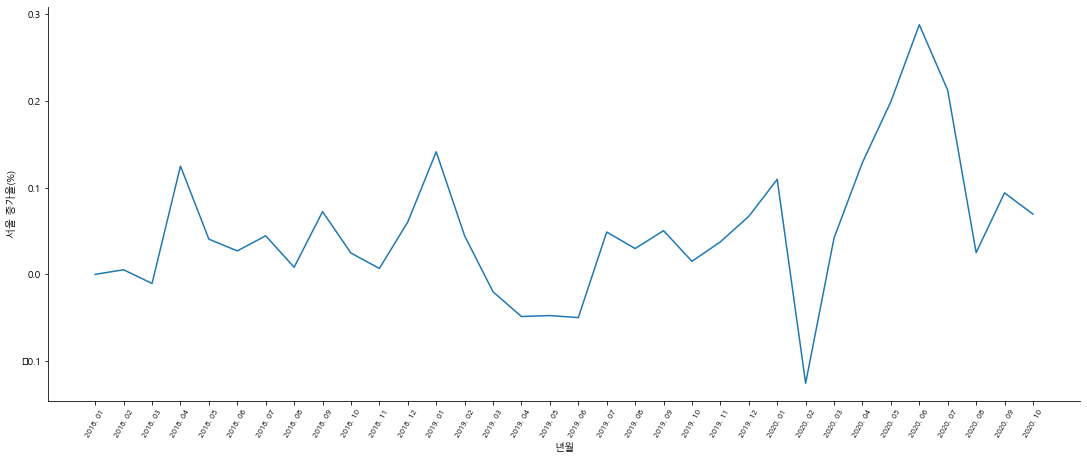

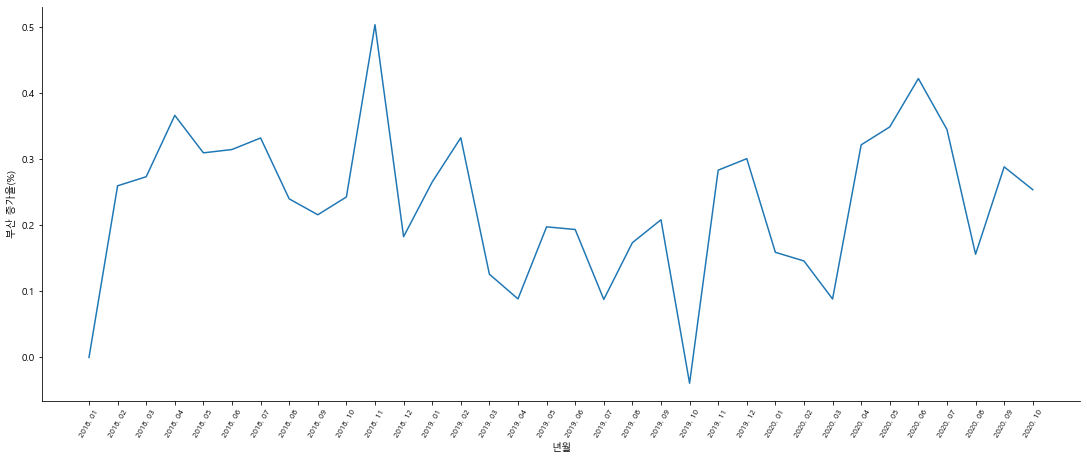

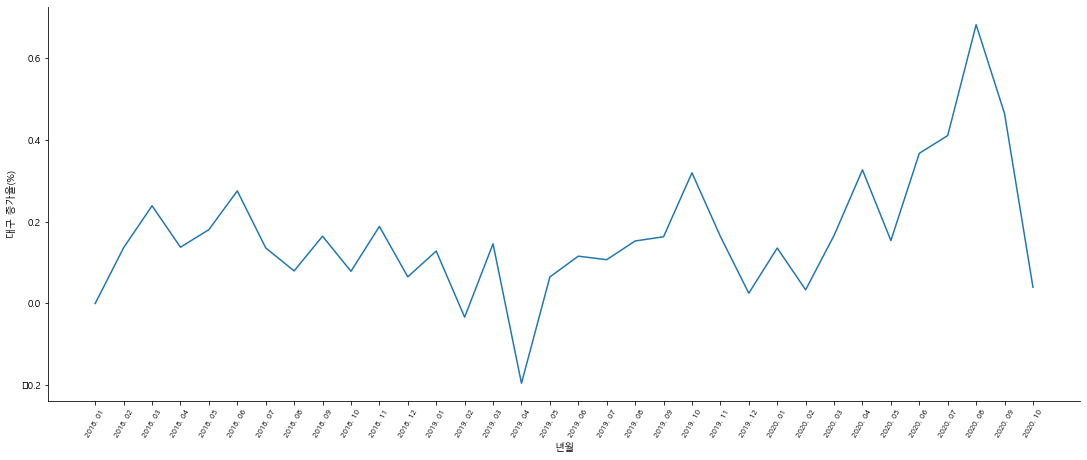

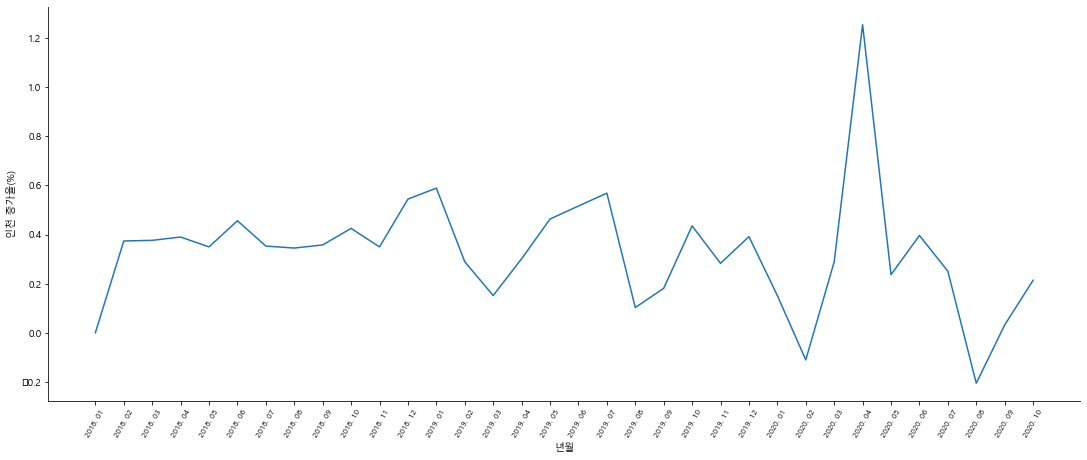

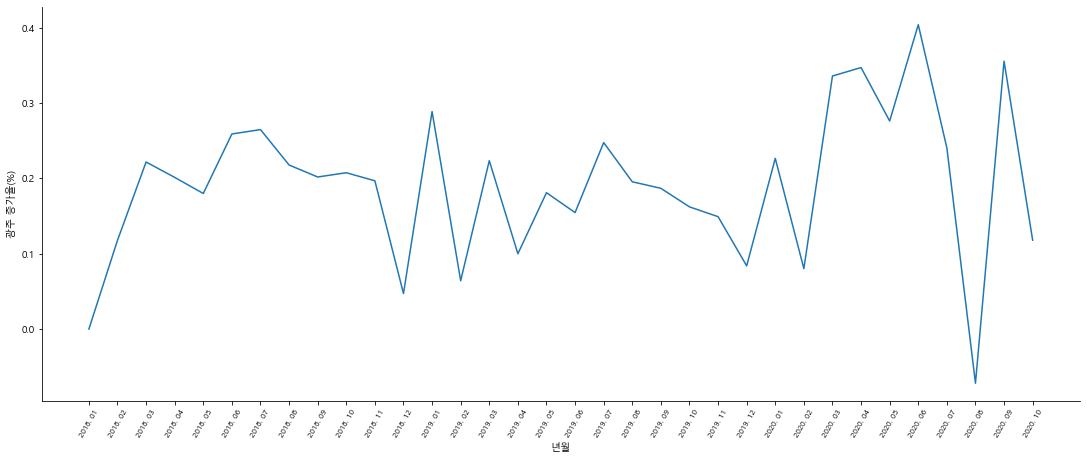

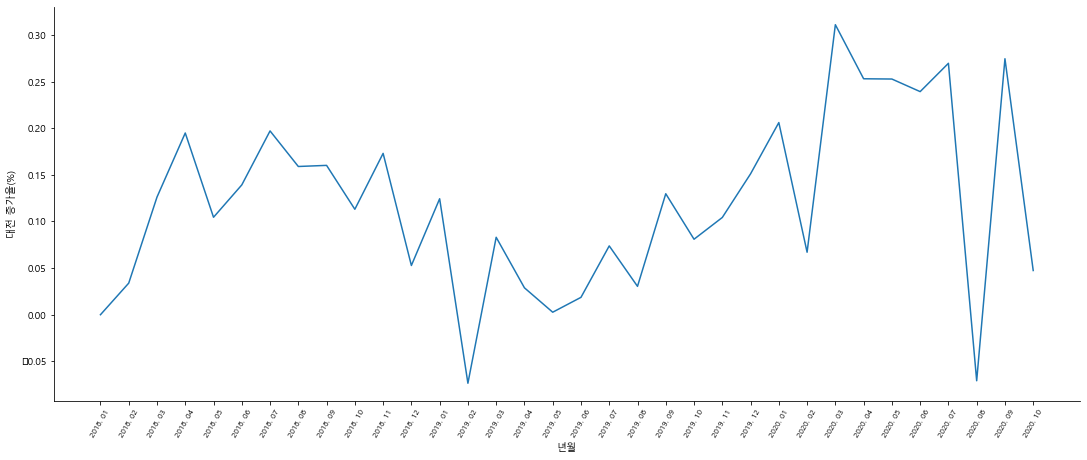

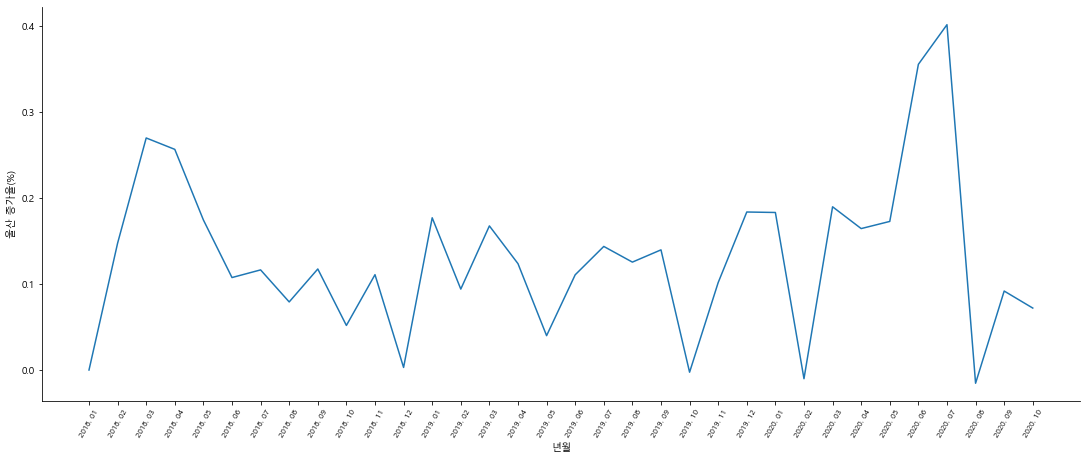

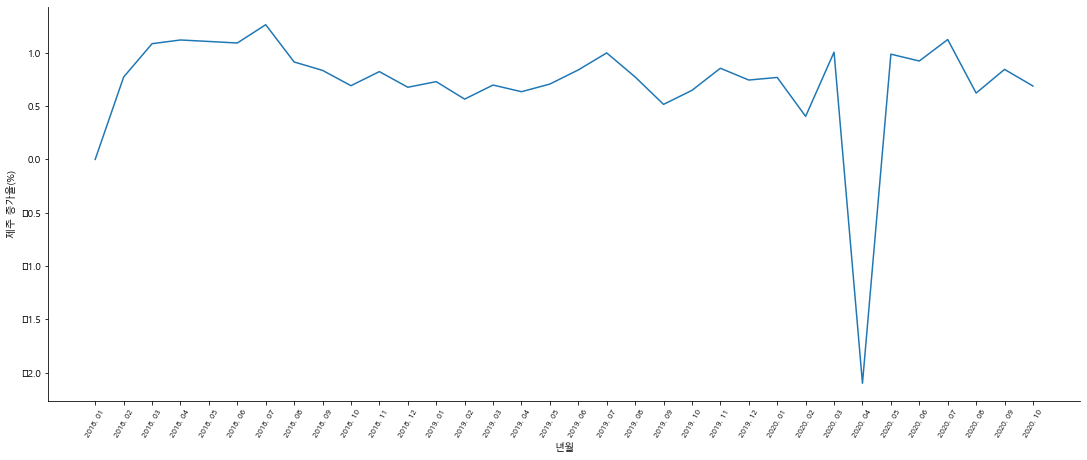

In [90]:
sns.relplot(x="년월", y="서울 증가율(%)", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="부산 증가율(%)", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="대구 증가율(%)", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="인천 증가율(%)", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="광주 증가율(%)", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="대전 증가율(%)", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="울산 증가율(%)", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)
sns.relplot(x="년월", y="제주 증가율(%)", data=fuel_df, kind='line', height=6, aspect=2.5)
plt.xticks(size=8,rotation=60)

In [83]:
elec_df=pd.read_excel('elec_car01.xlsx', index_col='년월')
elec_df.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
년월,,,,,,,,,,,,,,,,,
2018. 01,1201,396,638,251,200,106,191,26,833,177,102,181,142,407,267,462,3331
2018. 02,1202,424,630,258,202,110,193,26,851,179,103,180,145,414,275,468,3346
2018. 03,1289,452,747,277,220,133,200,29,964,199,115,185,157,442,290,517,3377
2018. 04,1408,492,822,300,248,151,225,49,1091,226,195,224,197,479,345,560,3491
2018. 05,1644,610,1021,368,308,187,280,57,1355,269,227,264,235,532,394,625,3541


In [84]:
fuel_df=pd.read_excel('fuel_car01.xlsx', index_col='년월')
fuel_df.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
년월,,,,,,,,,,,,,,,,,
2018. 01,2643177,1088666,958979,1268157,535707,549043,460716,112123,4391093,562318,600260,796339,671863,714511,1025050,1316339,400276
2018. 02,2643317,1091492,960286,1272896,536338,549229,461396,114005,4401156,563289,601707,799108,673028,716281,1026505,1318231,403364
2018. 03,2643039,1094475,962578,1277685,537527,549922,462642,115849,4419701,565157,603992,802670,674568,719811,1028907,1321802,407739
2018. 04,2646341,1098482,963901,1282664,538609,550994,463830,117703,4439557,567011,606479,805577,677150,722820,1031583,1324208,412303
2018. 05,2647416,1101881,965639,1287148,539578,551570,464640,119168,4458428,568368,608568,807971,679042,726511,1034074,1325821,416861


In [85]:
# 전체 승용차 차량 중 전기차 비율, 0.5% 
rate_all = round((elec_df.iloc[33].sum()/fuel_df.iloc[33].sum())*100,2)
rate_all 

0.5

In [88]:
# 지역별 승용차 차량 대비 전기차 비율 (제주,대구,울산)
rate_e = round((elec_df.iloc[33]/fuel_df.iloc[33])*100,2)
rate_e = rate_e.sort_values(ascending=False) 
rate_e

제주    2.41
대구    0.89
울산    0.71
서울    0.63
대전    0.59
세종    0.58
강원    0.55
광주    0.53
충남    0.48
충북    0.46
전남    0.46
경북    0.37
부산    0.36
전북    0.35
경남    0.35
경기    0.32
인천    0.28
Name: 2020. 10, dtype: float64

<AxesSubplot:xlabel='2020. 10', ylabel='Count'>

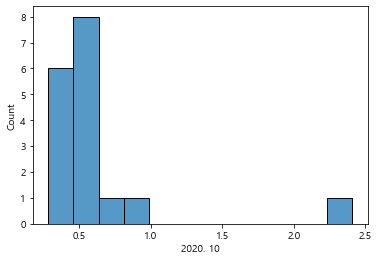

In [89]:
sns.histplot(data=rate_e)

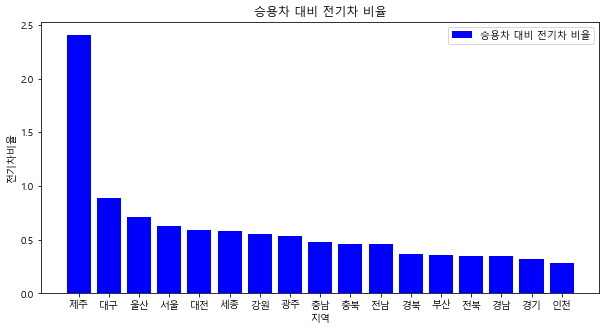

In [90]:
plt.figure(figsize=(10,5))
plt.bar(rate_e.index, rate_e.values, label='승용차 대비 전기차 비율', color='b')
plt.title('승용차 대비 전기차 비율') 
plt.xlabel('지역')
plt.ylabel('전기차비율')
plt.legend()
plt.show()

In [91]:
#인구 데이타  불러오기 
popu_df = pd.read_excel('population02.xlsx',index_col='년월')
popu_df.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
년월,,,,,,,,,,,,,,,,,
2018. 01,9851767,3467055,2474309,2950771,1464037,1501378,1164489,283198,12890445,1548078,1593903,2117685,1851694,1893444,2688747,3379981,658167
2018. 02,9845336,3465407,2473466,2951629,1463100,1499187,1163151,288079,12908010,1546259,1594066,2118099,1849543,1891308,2685633,3378430,659189
2018. 03,9838892,3463103,2472175,2951442,1462033,1497572,1162074,291182,12925761,1546152,1594708,2119468,1848066,1890423,2683661,3377516,660441
2018. 04,9830452,3460707,2471136,2952476,1460972,1496123,1161303,295041,12941604,1545452,1595164,2120666,1847089,1890412,2682897,3377126,661511
2018. 05,9820971,3458134,2469936,2953255,1460564,1495234,1160657,297604,12958648,1545291,1595822,2121618,1846144,1889726,2682316,3377626,662633


In [94]:
#인구 대비 전기차 비율 (update)
elec_popu_rate = round((elec_df.iloc[33,0:].astype('int')/popu_df.iloc[33,0:].astype('int')*100),2)
elec_popu_rate = elec_popu_rate.sort_values(ascending=False)
elec_popu_rate

제주    1.83
대구    0.37
울산    0.30
세종    0.25
대전    0.23
강원    0.22
광주    0.21
전남    0.20
충남    0.20
충북    0.19
서울    0.18
경남    0.15
경북    0.15
전북    0.14
인천    0.14
부산    0.12
경기    0.12
Name: 2020. 10, dtype: float64

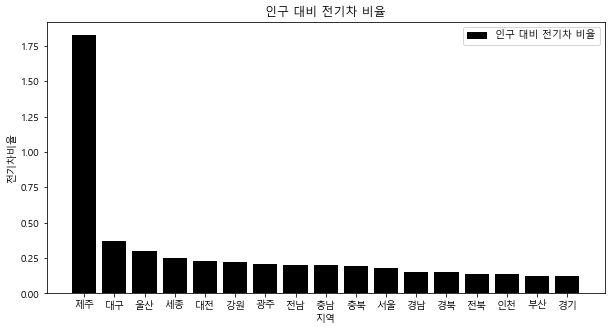

In [127]:
plt.figure(figsize=(10,5))
plt.bar(elec_popu_rate.index, elec_popu_rate.values, label='인구 대비 전기차 비율', color='k')
plt.title('인구 대비 전기차 비율') 
plt.xlabel('지역')
plt.ylabel('전기차비율')
plt.legend()
plt.show()

In [95]:
# 충전소 데이타 불러오기 
char_df = pd.read_excel('충전소리스트.xls')
char_df.head()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,급속충전량,비고
0,환경부(한국자동차환경협회),종묘 공영주차장,1,DC차데모+AC3상,서울특별시,종로구,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",24시간 이용가능,급속(50kW),주차비 5분 200원(저공해스티커 부착시)
1,환경부(한국자동차환경협회),세종로 공영주차장,1,DC차데모+AC3상+DC콤보,서울특별시,종로구,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",24시간 이용가능,급속(50kW),주차비 저공해스티커 있을시 5분당 150원
2,환경부(한국자동차환경협회),그랜드앰배서더 서울,1,DC차데모+AC3상+DC콤보,서울특별시,중구,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",24시간 이용가능,급속(50kW),NaN
3,환경부(한국자동차환경협회),한강진역 공영주차장,1,DC차데모+AC3상,서울특별시,용산구,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",24시간 이용가능,급속(50kW),주차비 10분 250원(친환경차 50% 감면)
4,환경부(한국자동차환경협회),마장동사무소 앞(공중전화부스),1,DC차데모+AC3상+DC콤보,서울특별시,성동구,서울특별시 성동구 마장동 808 (마장동 808),24시간 이용가능,급속(50kW),NaN


In [96]:
char_df.tail()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,급속충전량,비고
33291,울산시,영남알프스복합웰컴센터,2,DC콤보,울산광역시,울주군,울산광역시 울주군 상북면 등억알프스리 517,24시간 이용가능,NaN,NaN
33292,울산시,영남알프스복합웰컴센터,1,DC콤보,울산광역시,울주군,울산광역시 울주군 상북면 등억알프스리 517,24시간 이용가능,NaN,NaN
33293,울산시,언양읍 행정복지센터,1,DC콤보,울산광역시,울주군,울산광역시 울주군 언양읍 동문길 7,24시간 이용가능,NaN,NaN
33294,울산시,화봉공원 공영주차장,2,DC콤보,울산광역시,북구,울산광역시 북구 화봉동 445-1,24시간 이용가능,NaN,NaN
33295,울산시,화봉공원 공영주차장,1,DC콤보,울산광역시,북구,울산광역시 북구 화봉동 445-1,24시간 이용가능,NaN,NaN


In [97]:
char_df.shape

(33296, 10)

In [98]:
char_df.columns

Index(['운영기관', '충전소', '충전기ID', '충전기타입', '지역', '시군구', '주소', '이용가능시간', '급속충전량',
       '비고'],
      dtype='object')

In [99]:
char_df['지역'] = char_df['지역'].str.strip(' ')

In [100]:
#지역명 다른 데이타와 동일하게 변경 
char_df = char_df.replace('서울특별시','서울')
char_df = char_df.replace('경기도','경기')
char_df = char_df.replace('제주특별자치도','제주')
char_df = char_df.replace('경상북도','경북')
char_df = char_df.replace('경상남도','경남')
char_df = char_df.replace('충청남도','충남')
char_df = char_df.replace('충청북도','충북')
char_df = char_df.replace('전라남도','전남')
char_df = char_df.replace('전라북도','전북')
char_df = char_df.replace('강원도','강원')
char_df = char_df.replace('대구광역시','대구')
char_df = char_df.replace('부산광역시','부산')
char_df = char_df.replace('광주광역시','광주')
char_df = char_df.replace('인천광역시','인천')
char_df = char_df.replace('대전광역시','대전')
char_df = char_df.replace('울산광역시','울산')
char_df = char_df.replace('세종특별자치시','세종')
char_df

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,급속충전량,비고
0,환경부(한국자동차환경협회),종묘 공영주차장,1,DC차데모+AC3상,서울,종로구,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",24시간 이용가능,급속(50kW),주차비 5분 200원(저공해스티커 부착시)
1,환경부(한국자동차환경협회),세종로 공영주차장,1,DC차데모+AC3상+DC콤보,서울,종로구,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",24시간 이용가능,급속(50kW),주차비 저공해스티커 있을시 5분당 150원
2,환경부(한국자동차환경협회),그랜드앰배서더 서울,1,DC차데모+AC3상+DC콤보,서울,중구,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",24시간 이용가능,급속(50kW),NaN
3,환경부(한국자동차환경협회),한강진역 공영주차장,1,DC차데모+AC3상,서울,용산구,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",24시간 이용가능,급속(50kW),주차비 10분 250원(친환경차 50% 감면)
4,환경부(한국자동차환경협회),마장동사무소 앞(공중전화부스),1,DC차데모+AC3상+DC콤보,서울,성동구,서울특별시 성동구 마장동 808 (마장동 808),24시간 이용가능,급속(50kW),NaN
...,...,...,...,...,...,...,...,...,...,...
33291,울산시,영남알프스복합웰컴센터,2,DC콤보,울산,울주군,울산광역시 울주군 상북면 등억알프스리 517,24시간 이용가능,NaN,NaN
33292,울산시,영남알프스복합웰컴센터,1,DC콤보,울산,울주군,울산광역시 울주군 상북면 등억알프스리 517,24시간 이용가능,NaN,NaN
33293,울산시,언양읍 행정복지센터,1,DC콤보,울산,울주군,울산광역시 울주군 언양읍 동문길 7,24시간 이용가능,NaN,NaN
33294,울산시,화봉공원 공영주차장,2,DC콤보,울산,북구,울산광역시 북구 화봉동 445-1,24시간 이용가능,NaN,NaN


In [101]:
operater = char_df['운영기관'].value_counts().sort_values(ascending=False)
operater

에버온               7745
케이티               5712
환경부(한국자동차환경협회)    4063
지엔텔               2094
차지비               2033
한국전기차충전서비스        1808
이카플러그             1506
한국전력              1432
제주전기자동차서비스        1383
대영채비              1335
에스트래픽             1012
타디스테크놀로지           849
파워큐브               673
제주                 442
클린일렉스              267
차지인                199
대구환경공단             143
매니지온               105
GS칼텍스               90
SK에너지               86
광주시                 59
기아자동차               54
시그넷이브이              28
울산시                 28
울릉군청                22
인천국제공항              16
evMost              15
군포시                 14
나주시                 13
서울시(한국자동차환경협회)      13
한국컴퓨터               11
익산시                 10
제주에너지공사              7
제주테크노파크              7
보타리에너지               6
삼척시                  4
수원시                  3
전주시                  3
한국환경공단               2
정읍시                  2
부안군                  1
태백시청                 1
Name: 운영기관, dtype: int64

In [102]:
operater.to_excel('operater.xlsx')

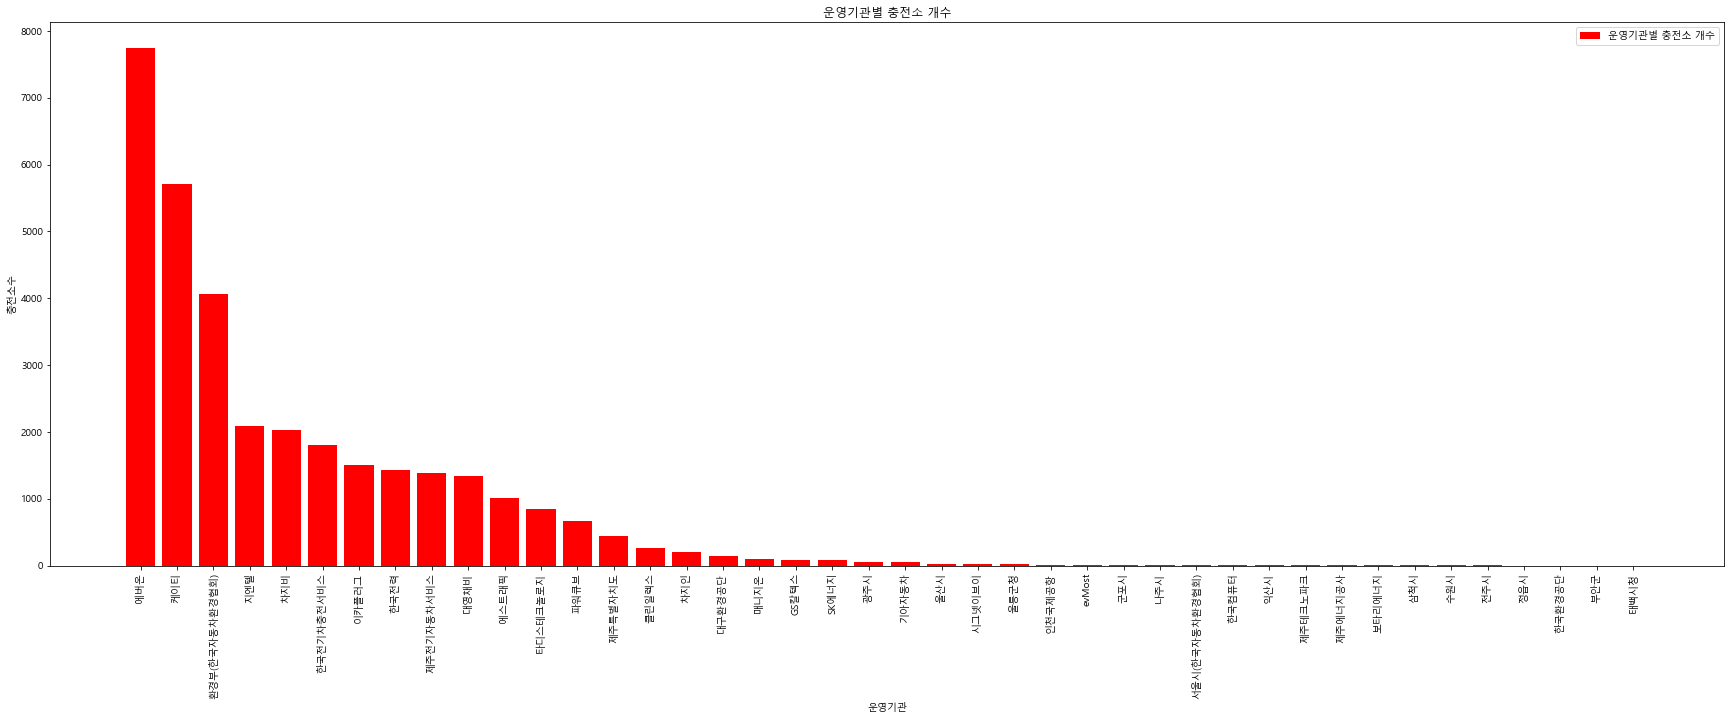

In [163]:
plt.figure(figsize=(30,10))
plt.bar(operater.index, operater.values, label='운영기관별 충전소 개수', color='r')
plt.title('운영기관별 충전소 개수') 
plt.xticks(size=10,rotation=90)
plt.xlabel('운영기관')
plt.ylabel('충전소수')
plt.legend()
plt.show()
 #에버온 > 케이티> 환경부 순  

In [105]:
#도시별 충전소 개수 
city_ct = char_df['지역'].value_counts().sort_values(ascending=False)
#city_ct = city_ct.to_frame()
#city_ct = city_ct.rename(columns = {'지역':'충전소개수'})
city_ct

경기    7349
서울    3585
제주    3109
경북    2140
경남    2042
충남    2030
전남    1810
전북    1673
강원    1599
대구    1361
부산    1324
충북    1244
광주    1236
인천    1123
대전     802
울산     597
세종     272
Name: 지역, dtype: int64

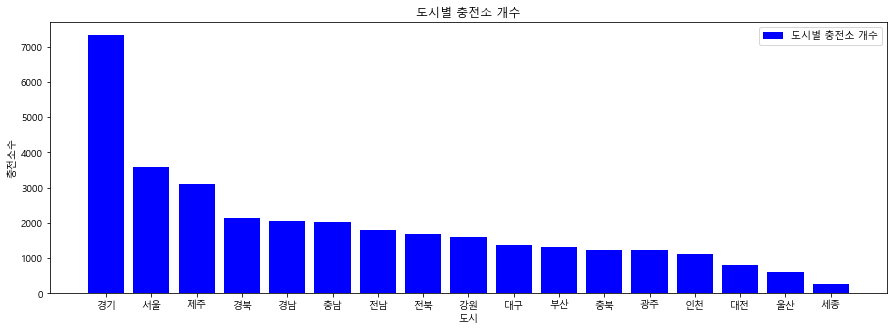

In [106]:
plt.figure(figsize=(15,5))
plt.bar(city_ct.index, city_ct.values, label='도시별 충전소 개수', color='b')
plt.title('도시별 충전소 개수') 
plt.xlabel('도시')
plt.ylabel('충전소수')
plt.legend()
plt.show()

In [107]:
# 충전소 데이타 filtering 
map_df = char_df.filter(items=['지역','시군구','충전소','주소','급속충전량'])
map_df

,지역,시군구,충전소,주소,급속충전량
0,서울,종로구,종묘 공영주차장,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",급속(50kW)
1,서울,종로구,세종로 공영주차장,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",급속(50kW)
2,서울,중구,그랜드앰배서더 서울,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",급속(50kW)
3,서울,용산구,한강진역 공영주차장,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",급속(50kW)
4,서울,성동구,마장동사무소 앞(공중전화부스),서울특별시 성동구 마장동 808 (마장동 808),급속(50kW)
...,...,...,...,...,...
33291,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,NaN
33292,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,NaN
33293,울산,울주군,언양읍 행정복지센터,울산광역시 울주군 언양읍 동문길 7,NaN
33294,울산,북구,화봉공원 공영주차장,울산광역시 북구 화봉동 445-1,NaN


In [108]:
# 완속 충전기에 대해 표시안되어 있음을 완속으로 변경 
map_df = map_df.replace(np.nan,'완속')
map_df           

,지역,시군구,충전소,주소,급속충전량
0,서울,종로구,종묘 공영주차장,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",급속(50kW)
1,서울,종로구,세종로 공영주차장,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",급속(50kW)
2,서울,중구,그랜드앰배서더 서울,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",급속(50kW)
3,서울,용산구,한강진역 공영주차장,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",급속(50kW)
4,서울,성동구,마장동사무소 앞(공중전화부스),서울특별시 성동구 마장동 808 (마장동 808),급속(50kW)
...,...,...,...,...,...
33291,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33292,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33293,울산,울주군,언양읍 행정복지센터,울산광역시 울주군 언양읍 동문길 7,완속
33294,울산,북구,화봉공원 공영주차장,울산광역시 북구 화봉동 445-1,완속


In [109]:
#급속 종류 코멘트 '급속'으로 일괄 변경 (update)
map_df = map_df.replace('급속(50kW)','급속')
map_df = map_df.replace('급속(200kW동시)','급속')
map_df = map_df.replace('급속(100kW멀티)','급속')
map_df = map_df.replace('급속(100kW동시)','급속')
map_df = map_df.replace('급속(400kW동시)','급속')
map_df = map_df.replace('급속(500kW동시)','급속')
map_df = map_df.replace('급속(600kW동시)','급속')
map_df = map_df.replace('급속(700kW동시)','급속')
map_df = map_df.replace('급속(1000kW동시)','급속')
map_df.head() 


,지역,시군구,충전소,주소,급속충전량
0,서울,종로구,종묘 공영주차장,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",급속
1,서울,종로구,세종로 공영주차장,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",급속
2,서울,중구,그랜드앰배서더 서울,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",급속
3,서울,용산구,한강진역 공영주차장,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",급속
4,서울,성동구,마장동사무소 앞(공중전화부스),서울특별시 성동구 마장동 808 (마장동 808),급속


In [110]:
# 급속충전량 칼럼 급속/완속으로 변경 
map_df = map_df.rename(columns = {'급속충전량':'급속/완속'})
map_df

,지역,시군구,충전소,주소,급속/완속
0,서울,종로구,종묘 공영주차장,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",급속
1,서울,종로구,세종로 공영주차장,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",급속
2,서울,중구,그랜드앰배서더 서울,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",급속
3,서울,용산구,한강진역 공영주차장,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",급속
4,서울,성동구,마장동사무소 앞(공중전화부스),서울특별시 성동구 마장동 808 (마장동 808),급속
...,...,...,...,...,...
33291,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33292,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33293,울산,울주군,언양읍 행정복지센터,울산광역시 울주군 언양읍 동문길 7,완속
33294,울산,북구,화봉공원 공영주차장,울산광역시 북구 화봉동 445-1,완속


In [111]:
#도시별 충전소수_급속/완속 (update)
citybeul_fs = map_df.groupby(['지역','급속/완속']).agg([len])
citybeul_fs

시군구   충전소    주소
           len   len   len
지역 급속/완속                  
강원 급속      394   394   394
   완속     1205  1205  1205
경기 급속      508   508   508
   완속     6841  6841  6841
경남 급속      295   295   295
   완속     1747  1747  1747
경북 급속      488   488   488
   완속     1652  1652  1652
광주 급속       73    73    73
   완속     1163  1163  1163
대구 급속      129   129   129
   완속     1232  1232  1232
대전 급속       95    95    95
   완속      707   707   707
부산 급속       83    83    83
   완속     1241  1241  1241
서울 급속      262   262   262
   완속     3323  3323  3323
세종 급속       34    34    34
   완속      238   238   238
울산 급속      114   114   114
   완속      483   483   483
인천 급속      125   125   125
   완속      998   998   998
전남 급속      369   369   369
   완속     1441  1441  1441
전북 급속      271   271   271
   완속     1402  1402  1402
제주 급속      253   253   253
   완속     2856  2856  2856
충남 급속      320   320   320
   완속     1710  1710  1710
충북 급속      250   250   250
   완속      994   994   994

In [112]:
#울산시 충전소 정보 데이타 
ulsan_map_df = map_df.loc[map_df['지역'].str.contains('울산')]
ulsan_map_df
    

,지역,시군구,충전소,주소,급속/완속
83,울산,중구,울산 중구 동천체육관,울산광역시 중구 염포로 85 동천 체육관 동편 주차장(남외동 673),급속
84,울산,동구,울산 동구 전하체육센터,울산광역시 동구 봉수로 285 전하체육센터 주차장 입구옆(전하동 559-8),급속
85,울산,북구,울산시 북구청,울산광역시 북구 연암동 산업로 1010 북구청,급속
86,울산,북구,농소2동 주민센터,울산광역시 북구 찬샘1길 24 (찬샘1길 24),급속
87,울산,울주군,울산 울주군 서생면사무소,울산광역시 울주군 서생면 해맞이로 894 서생면사무소 청사 건물 출입구 우측 주차장,급속
...,...,...,...,...,...
33291,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33292,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33293,울산,울주군,언양읍 행정복지센터,울산광역시 울주군 언양읍 동문길 7,완속
33294,울산,북구,화봉공원 공영주차장,울산광역시 북구 화봉동 445-1,완속


In [113]:
# 울산 급속 충전 vs 완속 충전기 개수 
ulsan_fast = ulsan_map_df['급속/완속'].value_counts().sort_values(ascending=False)
ulsan_fast

완속    483
급속    114
Name: 급속/완속, dtype: int64

In [116]:
#울산 시군구별 충전소 개수 
ulsan_elec_qty_df = ulsan_map_df['시군구'].value_counts().sort_values(ascending=False)
ulsan_elec_qty_df

울주군     224
남구      153
북구       89
중구       88
동구       43
Name: 시군구, dtype: int64

In [118]:
ulsan_elec_qty_df.to_excel('ulsan_elec_qty_df.xlsx')

In [119]:
#울산 시군구별 급속/완속 충전기 
#ulsan_elec__fs = ulsan_map_df.groupby('시군구')['급속/완속'].value_counts().sort_values(ascending=False)
ulsan_elec__fs = ulsan_map_df.groupby('시군구')['급속/완속'].value_counts()
ulsan_elec__fs 

시군구   급속/완속
남구    완속       114
      급속        39
동구    완속        32
      급속        11
북구    완속        58
      급속        31
울주군   완속       203
      급속        21
중구    완속        76
      급속        12
Name: 급속/완속, dtype: int64

In [120]:
ulsan_elec__fs.to_excel('ulsan_elec__fs.xlsx')

In [121]:
df1=elec_df.iloc[33]
df1= df1.to_frame()
df1

,2020. 10
서울,16960
부산,4216
대구,9068
인천,4027
광주,3003
대전,3400
울산,3433
세종,864
경기,15499
강원,3362


In [122]:
df2 = city_ct
df2 = df2.to_frame()
df2

,지역
경기,7349
서울,3585
제주,3109
경북,2140
경남,2042
충남,2030
전남,1810
전북,1673
강원,1599
대구,1361


In [123]:
# 전기차 수 대비 충전소 비율 
rate_ec = pd.concat([df1,df2],axis=1)
rate_ec = round(rate_ec['지역']/rate_ec['2020. 10'],2).sort_values(ascending=False)
rate_ec

전북    0.67
경북    0.53
전남    0.50
충남    0.48
강원    0.48
경기    0.47
경남    0.42
광주    0.41
충북    0.40
세종    0.31
부산    0.31
인천    0.28
제주    0.25
대전    0.24
서울    0.21
울산    0.17
대구    0.15
dtype: float64

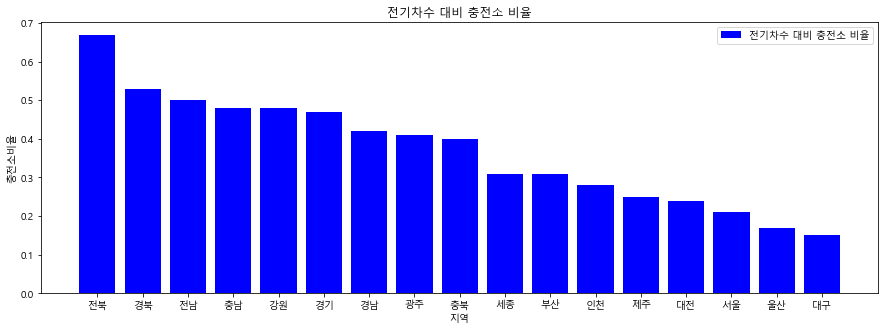

In [124]:
plt.figure(figsize=(15,5))
plt.bar(rate_ec.index, rate_ec.values, label='전기차수 대비 충전소 비율', color='b')
plt.title('전기차수 대비 충전소 비율') 
plt.xlabel('지역')
plt.ylabel('충전소비율')
plt.legend()
plt.show()

In [125]:
for i in ulsan_map_df.index:
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + ulsan_map_df.loc[i, '주소']
    rest_api_key = 'ff47bfb2076f314e4f49c060d75b9464'
    header = {'Authorization': 'KakaoAK ' + rest_api_key}
    resp = requests.get(url, headers=header)
    
    if resp.status_code == 200:
        jsondata = resp.json()
        if jsondata["meta"]["total_count"] == 0 :
            ulsan_map_df.loc[i, '위도'] = np.nan
            ulsan_map_df.loc[i, '경도'] = np.nan
        else :
            ulsan_map_df.loc[i, '위도'] = jsondata["documents"][0]["address"]["y"]
            ulsan_map_df.loc[i, '경도'] = jsondata["documents"][0]["address"]["x"]
    else:
        ulsan_map_df.loc[i, '위도'] = "ERROR[" + str(r.status_code) + "]"
        ulsan_map_df.loc[i, '경도'] = "ERROR[" + str(r.status_code) + "]"
    
ulsan_map_df

C:\Users\WS-home\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\WS-home\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\WS-home\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

,지역,시군구,충전소,주소,급속/완속,위도,경도
83,울산,중구,울산 중구 동천체육관,울산광역시 중구 염포로 85 동천 체육관 동편 주차장(남외동 673),급속,35.5610411920161,129.350485875962
84,울산,동구,울산 동구 전하체육센터,울산광역시 동구 봉수로 285 전하체육센터 주차장 입구옆(전하동 559-8),급속,35.5120000408547,129.422104364529
85,울산,북구,울산시 북구청,울산광역시 북구 연암동 산업로 1010 북구청,급속,35.5827074162639,129.36125360734
86,울산,북구,농소2동 주민센터,울산광역시 북구 찬샘1길 24 (찬샘1길 24),급속,35.6382902239359,129.348312442367
87,울산,울주군,울산 울주군 서생면사무소,울산광역시 울주군 서생면 해맞이로 894 서생면사무소 청사 건물 출입구 우측 주차장,급속,35.3499581076443,129.325938801114
...,...,...,...,...,...,...,...
33291,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속,35.5561186887712,129.068414910396
33292,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속,35.5561186887712,129.068414910396
33293,울산,울주군,언양읍 행정복지센터,울산광역시 울주군 언양읍 동문길 7,완속,35.5694147552733,129.125783085577
33294,울산,북구,화봉공원 공영주차장,울산광역시 북구 화봉동 445-1,완속,35.5889950493028,129.364458028869


In [126]:
ulsan_map_df = ulsan_map_df.dropna()

In [127]:
ulsan_map = folium.Map(location=[35.5610411920161,129.350485875962], zoom_start=12, tiles='OpenStreetMap')
ulsan_map

In [128]:
marker = folium.Marker([35.5610411920161,129.350485875962], popup='동천체육관', tooltip='환영합니다', icon=folium.Icon(icon='home', color='red'))
marker.add_to(ulsan_map)
ulsan_map.save('울산_충전소_현황.html')
ulsan_map

In [129]:
#지도로 표기
for i in ulsan_map_df.index:
    lat = ulsan_map_df.loc[i, '위도']
    lng = ulsan_map_df.loc[i, '경도']
    contents = folium.Popup('<b>'+ulsan_map_df.loc[i, '충전소']+'</b>'+'<br>'+ulsan_map_df.loc[i, '주소'], max_width=300)
    
    mark_type = ulsan_map_df.loc[i, '급속/완속']
    
    if mark_type == '급속':
        marker = folium.Marker([lat, lng], popup=contents, icon=folium.Icon(icon='home', color='red'))
    elif mark_type == '완속':
        marker = folium.Marker([lat, lng], popup=contents, icon=folium.Icon(icon='glass', color='black'))
    else :
        marker = folium.Marker([lat, lng], popup=contents, icon=folium.Icon(icon='bookmark', color='blue'))

    marker.add_to(ulsan_map)
    
ulsan_map.save('울산_충전소_현황.html')
ulsan_map
